# `ANALYSE AVANCEE EN PYTHON POUR GENERER DES INSIGHTS EXPLOITABLES A DESTINATION DES DEPARTEMENTS COMMERCIAL, MARKETING DE NETFLIX AFRICA, BASEE SUR LES DONNEES DU 24 MAI AU 23 AOÛT 2022 (90 JOURS OU 12 SEMAINES OU 3 MOIS)`

------------------------------------------------------------------------------------------------------------------------

- PLAN DU NOTEBOOKBOOK

<h1 style="color: green;"> 1- DEPARTEMENT COMMERCIAL </h1> - <h1 style="color: blue;"> 2- DEPARTEMENT MARKETING </h1> - 

------------------------------------------------------------------------------------------------------------------

 <h1 style="color: green;">1- LES INSIGHTS COMMERCIAUX : POUR L’OPTIMISATION DU CYCLE DE VENTE ET AMÉLIORATION DE LA GESTION DE LA RELATION CLIENT (CRM)</h1>


<h2 style="color: green;"> 0 - DATA CLEANING</h2>

In [459]:
# Importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [460]:
# Importation des donnees dans un DataFrame
df = pd.read_excel('datas_compt_mark_com.xlsx')

In [461]:
# Extraction du dataframe df_africa contenant que les pays d'Afrique
# Liste des pays africains en anglais

african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 
    'Congo (Congo-Brazzaville)', 'Democratic Republic of the Congo', 'Djibouti', 
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 
    'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 
    'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 
    'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 
    'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 
    'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Congo'
]

# Filtrage
df_africa = df[df['pays'].isin(african_countries)]

# Affichage
df_africa.head()


,id_location,id_client,code_client,prenom,nom,email,id_ville,ville,id_pays,pays,...,annee,mois,jour,trimestre,id_contenu,id_categorie_film,id_langue_film,acteur_principal,date_retour,montant
4,16078,280,T280B285,TRACEY,BARRETT,TRACEY.BARRETT@sakilacustomer.org,389,Owo,69,Nigeria,...,2022,5,31,2,16078,16,1,94,20220601,4.99
56,16074,277,O277J282,OLGA,JIMENEZ,OLGA.JIMENEZ@sakilacustomer.org,374,Ogbomosho,69,Nigeria,...,2022,5,26,2,16074,15,1,118,20220604,6.99
87,16226,363,R363W368,ROY,WHITING,ROY.WHITING@sakilacustomer.org,372,Nyeri,52,Kenya,...,2022,5,29,2,16226,12,1,63,20220605,3.99
100,16084,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,2022,5,27,2,16084,10,1,159,20220602,0.99
101,16085,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,2022,5,29,2,16085,4,1,61,20220601,0.99


In [462]:
# Liste des colonnes de df_africa
df_africa.columns

Index(['id_location', 'id_client', 'code_client', 'prenom', 'nom', 'email',
       'id_ville', 'ville', 'id_pays', 'pays', 'code_pays', 'id_temps',
       'date_location', 'annee', 'mois', 'jour', 'trimestre', 'id_contenu',
       'id_categorie_film', 'id_langue_film', 'acteur_principal',
       'date_retour', 'montant'],
      dtype='object')

In [463]:
# Ajout de la colonne montant en franc CFA (XOF) en multipliant 'montant' par 661,30
# Pour la periode du 24 mai au 24 novembre 2022, la valeur moyenne du dollar americain par rapport au franc CFA etait d'environ 661,30 CFA.

df_africa['montant_f_cfa'] = df_africa['montant'] * 661.30





In [464]:
df_africa.head()

,id_location,id_client,code_client,prenom,nom,email,id_ville,ville,id_pays,pays,...,mois,jour,trimestre,id_contenu,id_categorie_film,id_langue_film,acteur_principal,date_retour,montant,montant_f_cfa
4,16078,280,T280B285,TRACEY,BARRETT,TRACEY.BARRETT@sakilacustomer.org,389,Owo,69,Nigeria,...,5,31,2,16078,16,1,94,20220601,4.99,3299.887
56,16074,277,O277J282,OLGA,JIMENEZ,OLGA.JIMENEZ@sakilacustomer.org,374,Ogbomosho,69,Nigeria,...,5,26,2,16074,15,1,118,20220604,6.99,4622.487
87,16226,363,R363W368,ROY,WHITING,ROY.WHITING@sakilacustomer.org,372,Nyeri,52,Kenya,...,5,29,2,16226,12,1,63,20220605,3.99,2638.587
100,16084,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,5,27,2,16084,10,1,159,20220602,0.99,654.687
101,16085,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,5,29,2,16085,4,1,61,20220601,0.99,654.687


In [465]:
# Ajout de la colonne 'nombre_de_location' avec le nombre de locations par jour
df_africa['nombre_de_location'] = df_africa.groupby(['jour', 'mois', 'annee'])['id_location'].transform('count')


# Affichage du DataFrame mis à jour
df_africa.head()


,id_location,id_client,code_client,prenom,nom,email,id_ville,ville,id_pays,pays,...,jour,trimestre,id_contenu,id_categorie_film,id_langue_film,acteur_principal,date_retour,montant,montant_f_cfa,nombre_de_location
4,16078,280,T280B285,TRACEY,BARRETT,TRACEY.BARRETT@sakilacustomer.org,389,Owo,69,Nigeria,...,31,2,16078,16,1,94,20220601,4.99,3299.887,19
56,16074,277,O277J282,OLGA,JIMENEZ,OLGA.JIMENEZ@sakilacustomer.org,374,Ogbomosho,69,Nigeria,...,26,2,16074,15,1,118,20220604,6.99,4622.487,17
87,16226,363,R363W368,ROY,WHITING,ROY.WHITING@sakilacustomer.org,372,Nyeri,52,Kenya,...,29,2,16226,12,1,63,20220605,3.99,2638.587,25
100,16084,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,27,2,16084,10,1,159,20220602,0.99,654.687,18
101,16085,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,29,2,16085,4,1,61,20220601,0.99,654.687,25


In [466]:
df_africa['nombre_de_location'].max()

73

 <h2 style="color: green;"> 1-1 SEGMENTATION DES CLIENTS BASEE SUR LA GEOGRAPHIE</h2>

<h3 style="color: green;"> 1-1-1 Identification des villes et pays d'Afrique avec le plus haut taux de location.</h3>

            pays  nombre
0        Nigeria     349
1   South Africa     284
2          Egypt     161
3        Algeria      88
4       Tanzania      82
5     Mozambique      80
6        Morocco      70
7          Sudan      54
8          Kenya      53
9         Angola      52
10      Cameroon      51
11         Congo      50
12        Zambia      32
13          Chad      32
14        Gambia      30
15        Malawi      28
16       Senegal      25
17      Ethiopia      23
18       Tunisia      22
19    Madagascar      22


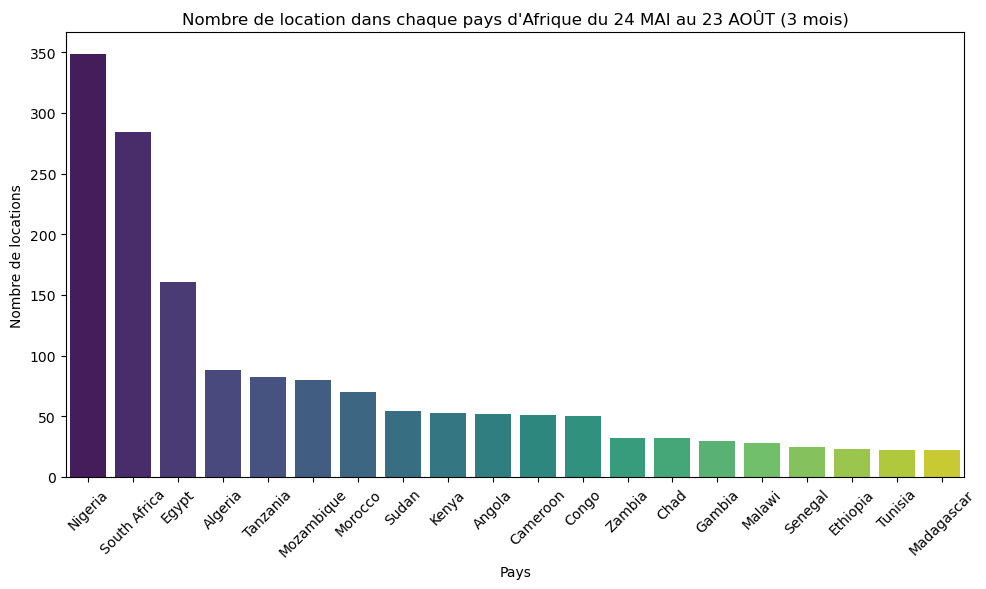

In [467]:
#  le nombre de location de chaque pays
country_counts = df_africa['pays'].value_counts().reset_index()
country_counts.columns = ['pays', 'nombre']

# Affichage du DataFrame des comptages
print(country_counts)

# le graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, x='pays', y='nombre', palette='viridis')
plt.title('Nombre de location dans chaque pays d\'Afrique du 24 MAI au 23 AOÛT (3 mois)')
plt.xlabel('Pays')
plt.ylabel('Nombre de locations')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

            pays             ville  nombre_locations
25    Mozambique             Beira                37
2        Algeria            Skikda                37
32       Nigeria            Ikerre                37
53         Sudan          Omdurman                35
15         Egypt  Shubra al-Khayma                34
59        Zambia             Kitwe                32
7           Chad           NDjamna                32
35       Nigeria         Ogbomosho                32
42  South Africa          Boksburg                32
33       Nigeria            Ilorin                31
17        Gambia            Banjul                30
19         Kenya             Nyeri                29
31       Nigeria               Ife                29
6       Cameroon            Yaound                29
55      Tanzania            Mwanza                29
43  South Africa        Botshabelo                28
49  South Africa             Paarl                28
10         Egypt           Bilbays            

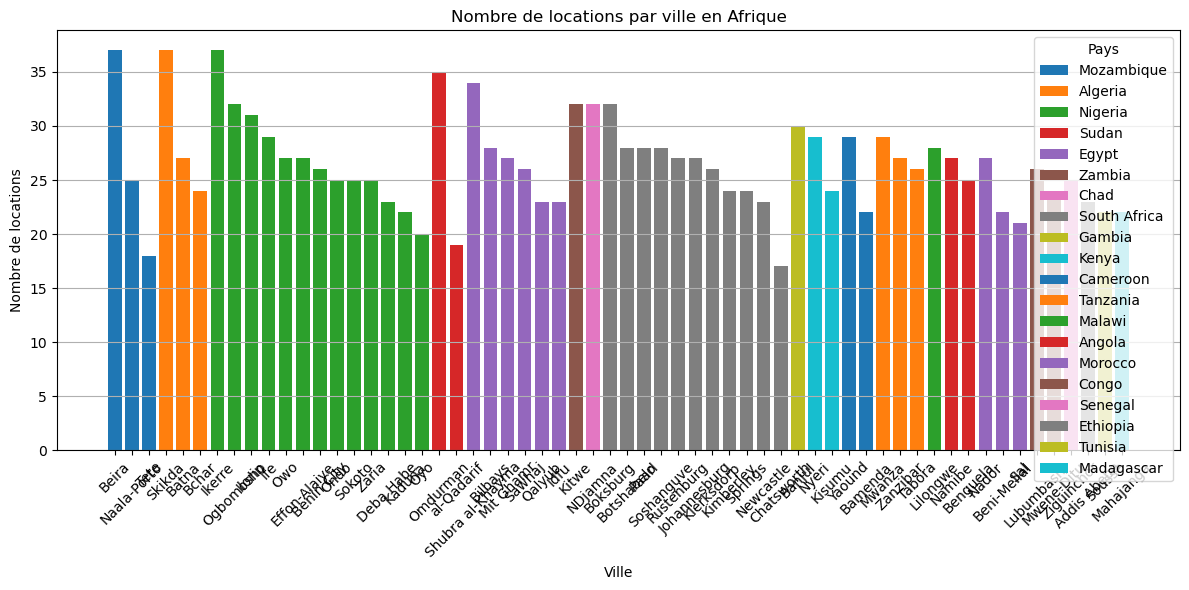

In [468]:
#  le nombre de locations par ville et pays
location_counts = df_africa.groupby(['pays', 'ville']).size().reset_index(name='nombre_locations')

# Classement par nombre de locations du plus grand au plus petit
location_counts = location_counts.sort_values(by='nombre_locations', ascending=False)

# Affichage des résultats
print(location_counts)

# Creation d'un graphique
plt.figure(figsize=(12, 6))
# Tracer les barres pour chaque pays et ville
for country in location_counts['pays'].unique():
    subset = location_counts[location_counts['pays'] == country]
    plt.bar(subset['ville'], subset['nombre_locations'], label=country)

plt.title('Nombre de locations par ville en Afrique')
plt.xlabel('Ville')
plt.ylabel('Nombre de locations')
plt.xticks(rotation=45)
plt.legend(title='Pays')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

<h3 style="color: green;"> 1-1-2 Adaptation des campagnes de vente et de fidélisation en fonction de la localisation (promotions localisées pour le top 20 des villes) </h3>

Top 20 des villes avec le plus grand nombre de locations :
            pays             ville  nombre_locations
25    Mozambique             Beira                37
2        Algeria            Skikda                37
32       Nigeria            Ikerre                37
53         Sudan          Omdurman                35
15         Egypt  Shubra al-Khayma                34
59        Zambia             Kitwe                32
7           Chad           NDjamna                32
35       Nigeria         Ogbomosho                32
42  South Africa          Boksburg                32
33       Nigeria            Ilorin                31
17        Gambia            Banjul                30
19         Kenya             Nyeri                29
31       Nigeria               Ife                29
6       Cameroon            Yaound                29
55      Tanzania            Mwanza                29
43  South Africa        Botshabelo                28
49  South Africa             Paarl      

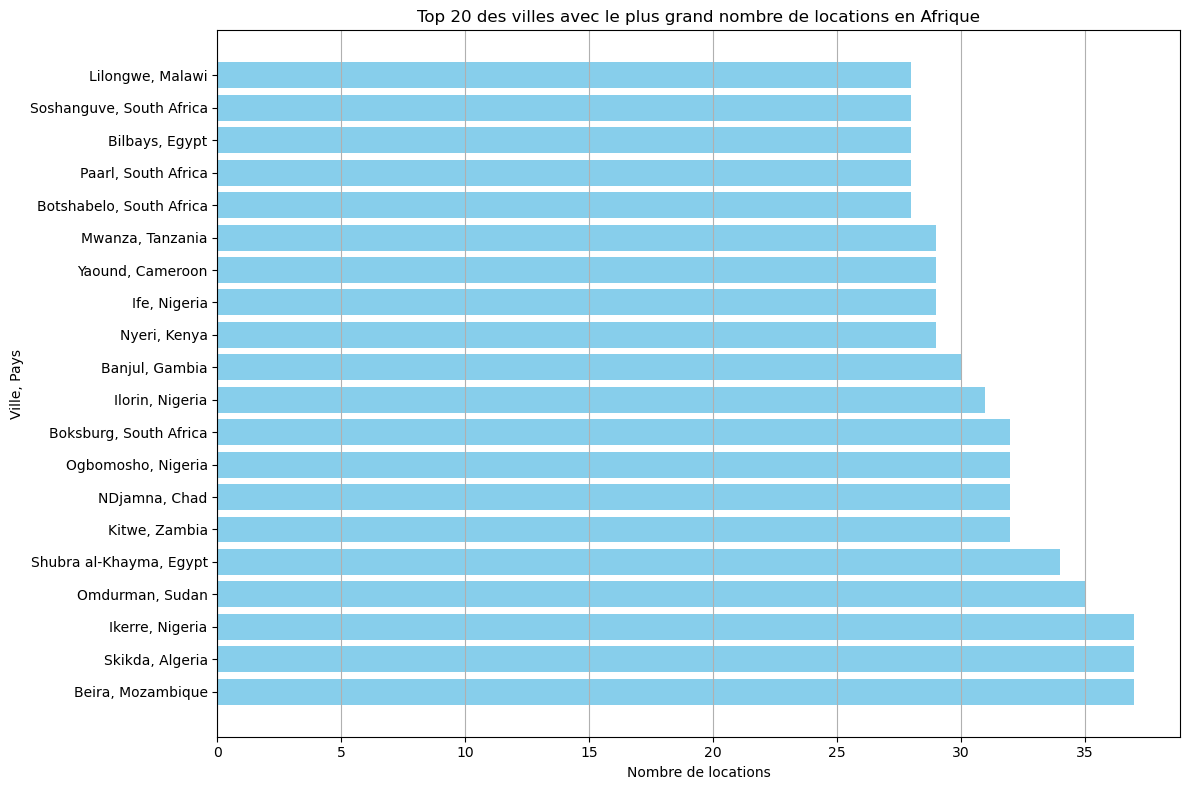

In [469]:
# Compte du nombre de locations par ville et pays
location_counts = df_africa.groupby(['pays', 'ville']).size().reset_index(name='nombre_locations')

# Identification des villes avec le plus grand nombre de locations (top 20)
top_locations = location_counts.sort_values(by='nombre_locations', ascending=False).head(20)

# Affichage des villes avec le plus grand nombre de locations
print("Top 20 des villes avec le plus grand nombre de locations :")
print(top_locations)

# Suggestions pour les campagnes de vente localisées
for index, row in top_locations.iterrows():
    print(f"Suggestion: Offrir des promotions spéciales à {row['ville']}, {row['pays']} pour augmenter la fidélisation.")

# Creation d'un graphique pour le Top 20 des villes
plt.figure(figsize=(12, 8))
plt.barh(top_locations['ville'] + ', ' + top_locations['pays'], top_locations['nombre_locations'], color='skyblue')
plt.title('Top 20 des villes avec le plus grand nombre de locations en Afrique')
plt.xlabel('Nombre de locations')
plt.ylabel('Ville, Pays')
plt.grid(axis='x')

#le graphique
plt.tight_layout()
plt.show()

<h3 style="color: green;"> 1-1-3 Identification des zones geographiques a faible potentiel</h3>

Villes avec le plus petit nombre de locations :
            pays        ville  nombre_locations
44  South Africa   Chatsworth                17
27    Mozambique         Tete                18
54         Sudan   al-Qadarif                19
38       Nigeria          Oyo                20
24       Morocco          Sal                21
34       Nigeria       Kaduna                22
58       Tunisia       Sousse                22
5       Cameroon      Bamenda                22
22       Morocco  Beni-Mellal                22
20    Madagascar    Mahajanga                22


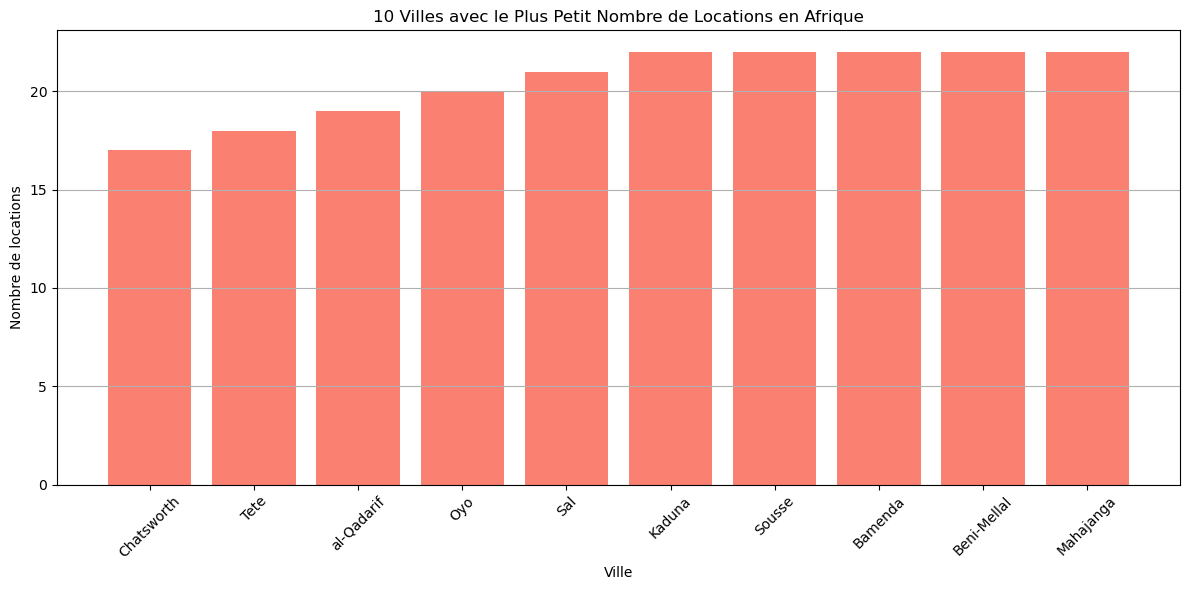

Suggestion: Offrir des promotions speciales a Chatsworth, South Africa pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Tete, Mozambique pour stimuler les locations.
Suggestion: Offrir des promotions speciales a al-Qadarif, Sudan pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Oyo, Nigeria pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Sal, Morocco pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Kaduna, Nigeria pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Sousse, Tunisia pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Bamenda, Cameroon pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Beni-Mellal, Morocco pour stimuler les locations.
Suggestion: Offrir des promotions speciales a Mahajanga, Madagascar pour stimuler les locations.


In [470]:
# Identification des villes avec le plus petit nombre de locations
bottom_locations = location_counts.sort_values(by='nombre_locations').head(10)

# Affichage des villes avec le plus petit nombre de locations
print("Villes avec le plus petit nombre de locations :")
print(bottom_locations)

# Creation d'un graphique
plt.figure(figsize=(12, 6))
plt.bar(bottom_locations['ville'], bottom_locations['nombre_locations'], color='salmon')
plt.title('10 Villes avec le Plus Petit Nombre de Locations en Afrique')
plt.xlabel('Ville')
plt.ylabel('Nombre de locations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Affichage du graphique
plt.tight_layout()
plt.show()

# Suggestions pour les campagnes de vente localisées
for index, row in bottom_locations.iterrows():
    print(f"Suggestion: Offrir des promotions speciales a {row['ville']}, {row['pays']} pour stimuler les locations.")

<h2 style="color: green;">   1-2 PREVISION ET OPTIMISATION DES REVENUS</h2>

<h3 style="color: green;"> 1-2-1 Prevision des pics de ventes selon la semaine et planification des offres adaptees (durant 24 aout au 24 novembre 2022) </h3>

In [471]:
############### VOIR EN BAS DU NOTEBOOK A CAUSE DU RESET DES INDEX #################################

<h3 style="color: green;"> 1-2-2 Analyse des variations de revenus par semaine pour detecter des opportunités de croissance </h3>

   date_location  montant_f_cfa  nombre_de_location  variation_revenus
0     2022-05-30     302835.722                2004                NaN
1     2022-06-06      62036.553                 361         -79.514784
2     2022-06-13          0.000                   0        -100.000000
3     2022-06-20     518545.169                5743                inf
4     2022-06-27      96318.345                1225         -81.425274
5     2022-07-04          0.000                   0        -100.000000
6     2022-07-11     793044.186               12856                inf
7     2022-07-18     143151.611                2809         -81.949100
8     2022-07-25          0.000                   0        -100.000000
9     2022-08-01    1079916.126               26124                inf
10    2022-08-08     149757.998                2916         -86.132442
11    2022-08-15          0.000                   0        -100.000000
12    2022-08-22    1143400.926               25678                inf
13    

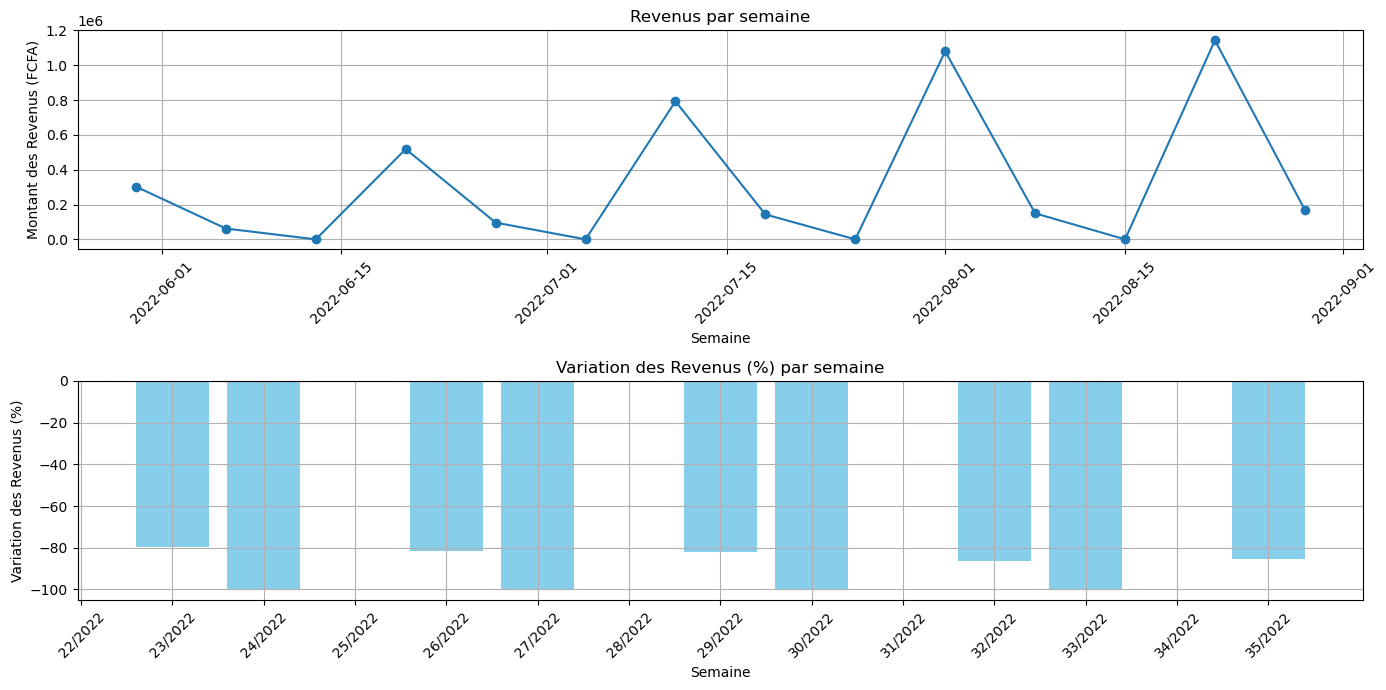

Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-06-06.
Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-06-13.
Suggestion: Évaluer les facteurs de succès lors de la semaine débutant le 2022-06-20 pour reproduire cette croissance.
Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-06-27.
Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-07-04.
Suggestion: Évaluer les facteurs de succès lors de la semaine débutant le 2022-07-11 pour reproduire cette croissance.
Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-07-18.
Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le 2022-07-25.
Suggestion: Évaluer les facteurs de succès lors de la semaine débutant le 2022-08-01 pour reproduire cette croissance.
Suggestion: Analyser les raisons de l

In [472]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversion de 'date_location' en type datetime
df_africa['date_location'] = pd.to_datetime(df_africa['date_location'], errors='coerce')

# Vérification des valeurs NaT après la conversion
if df_africa['date_location'].isna().any():
    print("Attention : certaines valeurs de 'date_location' n'ont pas pu être converties.")

# Étape 1: Agrégation des revenus par période (semaine) et comptage des locations
revenus_par_semaine = df_africa.resample('W-Mon', on='date_location').agg(
    {'montant_f_cfa': 'sum', 'nombre_de_location': 'sum'}
).reset_index()

# Étape 2: Calcul des variations de revenus
revenus_par_semaine['variation_revenus'] = revenus_par_semaine['montant_f_cfa'].pct_change() * 100  # Variation en pourcentage

# Affichage des résultats
print(revenus_par_semaine)

# Étape 3: Visualisation des revenus et des variations
plt.figure(figsize=(14, 7))

# Graphique des revenus
plt.subplot(2, 1, 1)
plt.plot(revenus_par_semaine['date_location'], revenus_par_semaine['montant_f_cfa'], marker='o', linestyle='-')
plt.title('Revenus par semaine')
plt.xlabel('Semaine')
plt.ylabel('Montant des Revenus (FCFA)')
plt.xticks(rotation=45)
plt.grid()

# Graphique des variations de revenus
plt.subplot(2, 1, 2)
plt.bar(revenus_par_semaine.index, revenus_par_semaine['variation_revenus'], color='skyblue')
plt.title('Variation des Revenus (%) par semaine')
plt.xlabel('Semaine')
plt.ylabel('Variation des Revenus (%)')
plt.xticks(revenus_par_semaine.index, revenus_par_semaine['date_location'].dt.strftime('%W/%Y'), rotation=45)
plt.axhline(0, color='red', linestyle='--')  
plt.grid()

plt.tight_layout()
plt.show()

# Suggestions pour des opportunités de croissance
for index, row in revenus_par_semaine.iterrows():
    if row['variation_revenus'] < 0:
        print(f"Suggestion: Analyser les raisons de la baisse des revenus lors de la semaine débutant le {row['date_location'].date()}.")
    elif row['variation_revenus'] > 10: 
        print(f"Suggestion: Évaluer les facteurs de succès lors de la semaine débutant le {row['date_location'].date()} pour reproduire cette croissance.")


<h3 style="color: green;"> 1-2-3 Identification des films ou séries générant le plus de revenus et ajustement des offres/recommandations pour les clients similaires

Contenus generant le plus de revenus :
      id_contenu  montant_f_cfa
27         16358       7267.687
1534       31392       7267.687
631        22297       7267.687
357        19642       7267.687
1324       29563       7267.687
...          ...            ...
1152       27132        654.687
1151       27107        654.687
1148       27104        654.687
711        23454        654.687
1183       27467        654.687

[1588 rows x 2 columns]


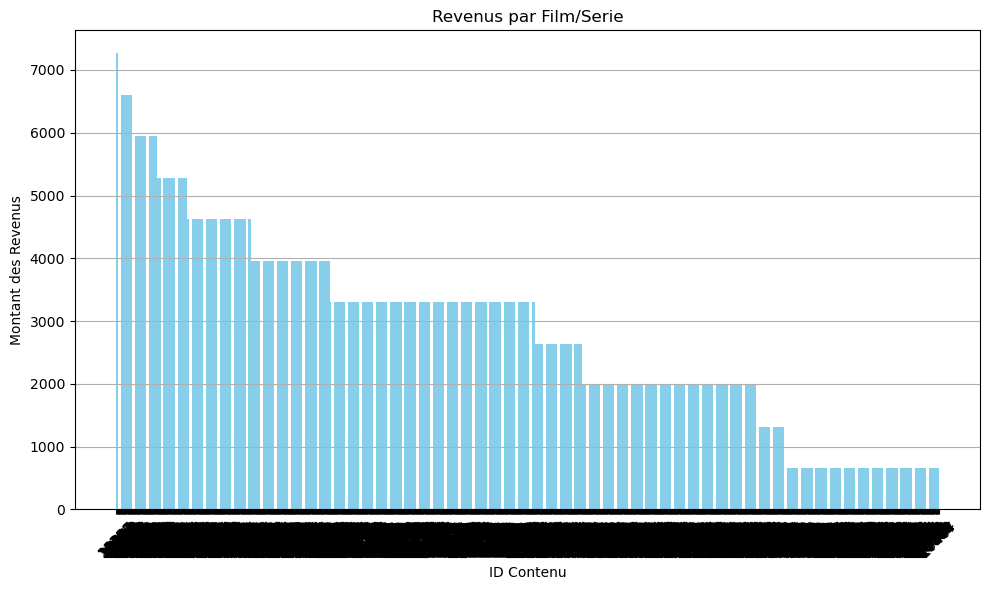


Recommandations pour les clients similaires :
Suggestion: Offrir une promotion sur le contenu 16358.0 aux clients avec ID 433.

Recommandations pour les clients similaires :
   id_client  id_contenu_recommande  \
0        433                16358.0   

                                     suggestion  
0  Offrir une promotion sur le contenu 16358.0.  

Les recommandations ont etr exportées dans 'recommandations_clients_similaires.csv'.


In [473]:
# Etape 1: Agregation des revenus par film/serie
revenus_par_contenu = df_africa.groupby(['id_contenu']).agg({'montant_f_cfa': 'sum'}).reset_index()

# Etape 2: Trie des contenus par revenus decroissants
revenus_par_contenu = revenus_par_contenu.sort_values(by='montant_f_cfa', ascending=False)

# Etape 3: Affichage des contenus generant le plus de revenus
print("Contenus generant le plus de revenus :")
print(revenus_par_contenu)

# Etape 4: Visualisation des revenus par contenu
plt.figure(figsize=(10, 6))
plt.bar(revenus_par_contenu['id_contenu'].astype(str), revenus_par_contenu['montant_f_cfa'], color='skyblue')
plt.title('Revenus par Film/Serie')
plt.xlabel('ID Contenu')
plt.ylabel('Montant des Revenus')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Etape 5: Ajustement des offres ou recommandations pour les clients similaires
# Exemple : Recommandantion de contenu le plus populaire aux clients
contenu_populaire = revenus_par_contenu.iloc[0]['id_contenu']  # Le contenu generant le plus de revenus
clients_similaires = df_africa[df_africa['id_contenu'] == contenu_populaire]['id_client'].unique()

print("\nRecommandations pour les clients similaires :")
for client in clients_similaires:
    print(f"Suggestion: Offrir une promotion sur le contenu {contenu_populaire} aux clients avec ID {client}.")
    
    
############# DataFrame pour les recommandations #################################

# Creation d'un DataFrame pour les recommandations
recommandations = pd.DataFrame({
    'id_client': clients_similaires,
    'id_contenu_recommande': contenu_populaire,
    'suggestion': [f"Offrir une promotion sur le contenu {contenu_populaire}." for _ in clients_similaires]
})

# Affichage des recommandations
print("\nRecommandations pour les clients similaires :")
print(recommandations)

# Etape 6: Exportation des recommandations en CSV
recommandations.to_csv('recommandations_clients_similaires.csv', index=False)
print("\nLes recommandations ont etr exportées dans 'recommandations_clients_similaires.csv'.")





<h2 style="color: green;">  1-3 PERSONNALISATION DE L’EXPERIENCE CLIENT (CRM)</h2>


<h3 style="color: green;"> 1-3-1 Personnalisation des suggestions de contenus selon les preferences des clients (langues, acteurs, genres populaires)</h3>

In [474]:
# Etape 1: Analyse Des preferences des clients
# Compte des preferences par client
preferences_clients = df_africa.groupby(['id_client', 'id_langue_film', 'acteur_principal', 'id_categorie_film']).agg({'montant_f_cfa': 'sum'}).reset_index()
preferences_clients['score'] = preferences_clients['montant_f_cfa'] / preferences_clients['montant_f_cfa'].sum()  

# Etape 2: Creation d'un DataFrame pour les suggestions
suggestions = pd.DataFrame()

# Generation de suggestions personnalisees
for client in df_africa['id_client'].unique():
    # Obtention des preferences du client
    preferences = preferences_clients[preferences_clients['id_client'] == client]

    if not preferences.empty:
        # Obtenir le contenu avec les mêmes préférences
        langues_preferees = preferences['id_langue_film'].tolist()
        acteurs_preferes = preferences['acteur_principal'].tolist()
        genres_preferes = preferences['id_categorie_film'].tolist()

        contenu_suggere = df_africa[
            df_africa['id_langue_film'].isin(langues_preferees) |
            df_africa['acteur_principal'].isin(acteurs_preferes) |
            df_africa['id_categorie_film'].isin(genres_preferes)
        ]

        # Suppression des contenus deja consultes
        contenu_suggere = contenu_suggere[~contenu_suggere['id_contenu'].isin(df_africa[df_africa['id_client'] == client]['id_contenu'])]

        # Ajout des suggestions au DataFrame
        suggestions = pd.concat([suggestions, contenu_suggere[['id_client', 'id_contenu', 'id_langue_film', 'acteur_principal', 'id_categorie_film']]], ignore_index=True)

# Etape 3: Affichage des suggestions
print("Suggestions personnalisees pour les clients :")
print(suggestions)

# Etape 4: Export des suggestions en CSV
suggestions.to_csv('suggestions_personnalisees.csv', index=False)
print("\nLes suggestions ont ete exportees dans 'suggestions_personnalisees.csv'.")

Suggestions personnalisees pour les clients :
       id_client  id_contenu  id_langue_film  acteur_principal  \
0            277       16074               1               118   
1            363       16226               1                63   
2            284       16084               1               159   
3            284       16085               1                61   
4            284       16086               1               171   
...          ...         ...             ...               ...   
93687        156       30763               1                61   
93688        156       30766               1               109   
93689        156       30768               1               137   
93690        257       31797               1               179   
93691        257       31813               1               135   

       id_categorie_film  
0                     15  
1                     12  
2                     10  
3                      4  
4                     13  

<h3 style="color: green;"> 1-3-2 Mise en place des campagnes de fidelisation avec des recommandations personnalisees </h3>

In [475]:
# Etape 1: Analyse des donnees des clients pour identifier les preferences
preferences_clients = df_africa.groupby(['id_client', 'id_langue_film', 'acteur_principal', 'id_categorie_film']).agg({'montant_f_cfa': 'sum'}).reset_index()
preferences_clients['score'] = preferences_clients['montant_f_cfa'] / preferences_clients['montant_f_cfa'].sum()  # Normaliser le score

# Etape 2: Creation des segments de clients
# Ici, nous allons juste creer des segments simples bases sur le montant total depense
client_segments = df_africa.groupby('id_client').agg({'montant_f_cfa': 'sum'}).reset_index()
client_segments['segment'] = pd.cut(client_segments['montant_f_cfa'], bins=[0, 300000, 600000, float('inf')], labels=['Bas', 'Moyen', 'Eleve'])

# Etape 3: Elaboration des recommandations personnalisees
recommendations = {}

for client in df_africa['id_client'].unique():
    # Obtention des preferences du client
    client_preferences = preferences_clients[preferences_clients['id_client'] == client]
    contenu_recommandes = []

    if not client_preferences.empty:
        langues_preferees = client_preferences['id_langue_film'].tolist()
        acteurs_preferes = client_preferences['acteur_principal'].tolist()
        genres_preferees = client_preferences['id_categorie_film'].tolist()

        # Filtre des contenus a recommander
        contenu_recommandes = df_africa[
            df_africa['id_langue_film'].isin(langues_preferees) |
            df_africa['acteur_principal'].isin(acteurs_preferes) |
            df_africa['id_categorie_film'].isin(genres_preferees)
        ]['id_contenu'].unique().tolist()

    recommendations[client] = contenu_recommandes

# Etape 4: Lancement des campagnes de fidelisation
for client, contenus in recommendations.items():
    if contenus:
        client_info = df_africa[df_africa['id_client'] == client].iloc[0]
        print(f"Envoyer une campagne de fidelisation a {client_info['prenom']} {client_info['nom']} ({client_info['email']}) avec les recommandations suivantes : {contenus}")
    else:
        print(f"Aucune recommandation pour le client ID {client}.")

# Etape 5: Export des recommandations en CSV
recommendation_df = pd.DataFrame.from_dict(recommendations, orient='index', columns=['id_contenu_recommande']).reset_index()
recommendation_df.columns = ['id_client', 'id_contenu_recommande']
recommendation_df.to_csv('recommandations_fidelisation.csv', index=False)
print("\nLes recommandations de fidelisation ont ete exportees dans 'recommandations_fidelisation.csv'.")

Envoyer une campagne de fidelisation a TRACEY BARRETT (TRACEY.BARRETT@sakilacustomer.org) avec les recommandations suivantes : [16078, 16074, 16226, 16084, 16085, 16086, 16223, 16087, 16191, 16207, 16224, 16318, 31737, 31801, 31806, 16267, 16277, 16253, 16276, 16355, 16357, 16370, 31733, 31734, 16254, 16255, 16268, 31802, 31804, 16256, 16279, 16375, 31800, 31810, 31812, 16278, 16354, 16536, 16721, 16825, 16850, 16851, 17025, 17095, 17270, 17276, 17717, 17871, 18241, 18317, 18577, 18924, 19171, 19173, 19234, 19641, 19715, 20384, 20730, 20732, 20861, 20862, 20864, 21013, 22063, 22128, 22270, 22296, 22494, 22500, 22501, 23071, 23075, 23341, 23481, 23695, 23838, 23918, 24054, 24186, 24190, 24531, 24828, 24982, 25052, 25256, 25260, 25290, 25338, 25360, 25940, 25947, 25982, 26595, 26936, 27047, 27048, 27133, 27138, 27695, 28194, 28273, 28421, 28455, 29222, 29564, 29883, 30514, 31229, 31383, 31533, 16356, 16358, 16431, 16551, 16566, 16636, 16714, 16715, 16824, 16898, 16899, 16920, 16921, 1693

ValueError: 1 columns passed, passed data had 1588 columns

<h3 style="color: green;"> 1-3-3 Identification des clients inactifs (durant 4 semaines) et lancement des campagnes de réactivation ciblées </h3>

In [476]:
# Etape 1: Identification des clients inactifs (sans location dans les 4 dernieres semaines)
# Definition de la periode d'inactivite
periode_inactive = pd.Timestamp.now() - pd.DateOffset(months=1)

# les clients actifs
clients_actifs = df_africa[df_africa['date_location'] >= periode_inactive]['id_client'].unique()

# Identification les clients inactifs
clients_inactifs = df_africa[~df_africa['id_client'].isin(clients_actifs)].drop_duplicates(subset=['id_client'])

# Etape 2: Preparation des campagnes de reactivation
campagnes_reactivation = {}
for client in clients_inactifs['id_client'].unique():
    client_info = clients_inactifs[clients_inactifs['id_client'] == client].iloc[0]
    campagnes_reactivation[client] = {
        'prenom': client_info['prenom'],
        'nom': client_info['nom'],
        'email': client_info['email']
    }

# Etape 3: Affichage des clients inactifs et les campagnes de reactivation
print("Clients inactifs identifies et prepares pour la reactivation :")
for client_id, info in campagnes_reactivation.items():
    print(f"Envoyer une campagne de reactivation a {info['prenom']} {info['nom']} ({info['email']})")

# Etape 4: Export de la liste des clients inactifs en CSV
clients_inactifs[['id_client', 'prenom', 'nom', 'email']].to_csv('clients_inactifs.csv', index=False)
print("\nLa liste des clients inactifs a ete exportee dans 'clients_inactifs.csv'.")


Clients inactifs identifies et prepares pour la reactivation :
Envoyer une campagne de reactivation a TRACEY BARRETT (TRACEY.BARRETT@sakilacustomer.org)
Envoyer une campagne de reactivation a OLGA JIMENEZ (OLGA.JIMENEZ@sakilacustomer.org)
Envoyer une campagne de reactivation a ROY WHITING (ROY.WHITING@sakilacustomer.org)
Envoyer une campagne de reactivation a SONIA GREGORY (SONIA.GREGORY@sakilacustomer.org)
Envoyer une campagne de reactivation a LAWRENCE LAWTON (LAWRENCE.LAWTON@sakilacustomer.org)
Envoyer une campagne de reactivation a VELMA LUCAS (VELMA.LUCAS@sakilacustomer.org)
Envoyer une campagne de reactivation a DENNIS GILMAN (DENNIS.GILMAN@sakilacustomer.org)
Envoyer une campagne de reactivation a ALBERT CROUSE (ALBERT.CROUSE@sakilacustomer.org)
Envoyer une campagne de reactivation a RODNEY MOELLER (RODNEY.MOELLER@sakilacustomer.org)
Envoyer une campagne de reactivation a JO FOWLER (JO.FOWLER@sakilacustomer.org)
Envoyer une campagne de reactivation a MARSHA DOUGLAS (MARSHA.DOUGL

<h2 style="color: green;"> 1-4 OPTIMISATION DU CATALOGUE DE CONTENU</h2>
 

<h3 style="color: green;"> 1-4-1 Identification des catégories de films/series les plus appreciees par segment de clients pour optimiser le contenu propose.</h3>

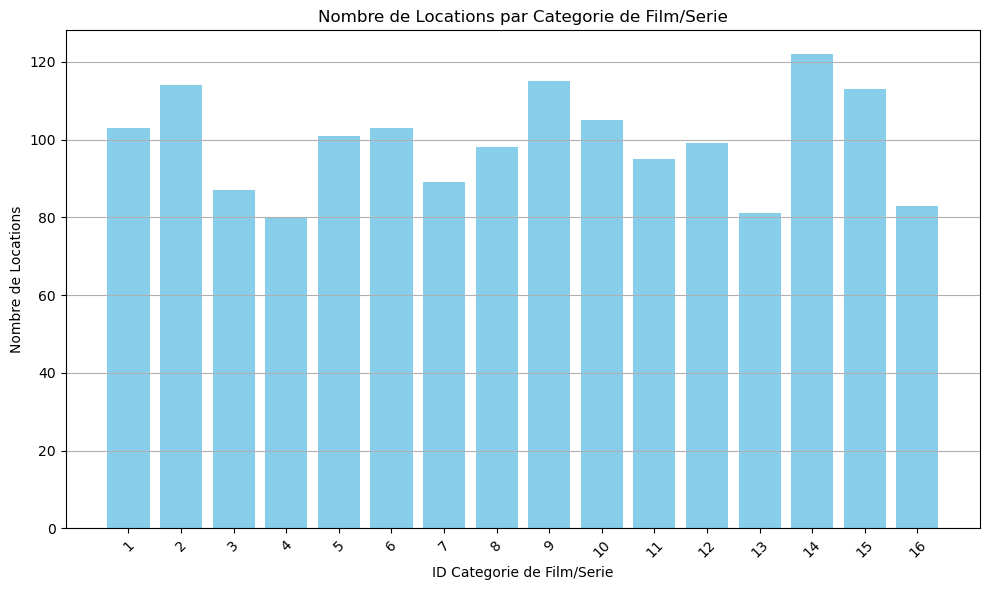

Categories de films/series les plus appreciees par segment de clients :
    id_categorie_film  nombre_locations  montant_f_cfa  id_client     prenom
0                   1               103     285661.761         40     AMANDA
1                   1               103     285661.761        190    YOLANDA
2                   1               103     285661.761        363        ROY
3                   1               103     285661.761        433        DON
4                   2               114     278314.718        103     GLADYS
5                   2               114     278314.718        132     ESTHER
6                   2               114     278314.718        145    LUCILLE
7                   2               114     278314.718        176       JUNE
8                   2               114     278314.718        383     MARTIN
9                   2               114     278314.718        392       SEAN
10                  2               114     278314.718        409     RODNEY
11  

In [477]:
# Etape 1: les donnees par categorie de film
categorie_appreciation = df_africa.groupby('id_categorie_film').agg({
    'id_location': 'count',  # Compte des locations par categorie
    'montant_f_cfa': 'sum'  # Somme des revenus par categorie
}).reset_index().rename(columns={'id_location': 'nombre_locations'})

# Etape 2: Identification des segments de clients 
segments_clients = df_africa.groupby(['id_client', 'prenom']).agg({
    'id_categorie_film': lambda x: x.mode()[0]  # Categorie la plus appreciee par client
}).reset_index()

# Etape 3: Fusion des donnees pour avoir une vue d'ensemble
resultats = pd.merge(categorie_appreciation, segments_clients, on='id_categorie_film', how='left')

# Etape 4: Visualisation des resultats
plt.figure(figsize=(10, 6))
plt.bar(resultats['id_categorie_film'].astype(str), resultats['nombre_locations'], color='skyblue')
plt.title('Nombre de Locations par Categorie de Film/Serie')
plt.xlabel('ID Categorie de Film/Serie')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Affichage des resultats
print("Categories de films/series les plus appreciees par segment de clients :")
print(resultats)

# Export des resultats dans un fichier CSV
resultats.to_csv('categories_appreciation_clients.csv', index=False, encoding='utf-8')
print("Les resultats ont ete exportes vers 'categories_appreciation_clients.csv'")




<h3 style="color: green;"> 1-4-2 Analyse de la performance des acteurs principaux dans les films ou series pour mieux negocier les contrats de production.</h3>

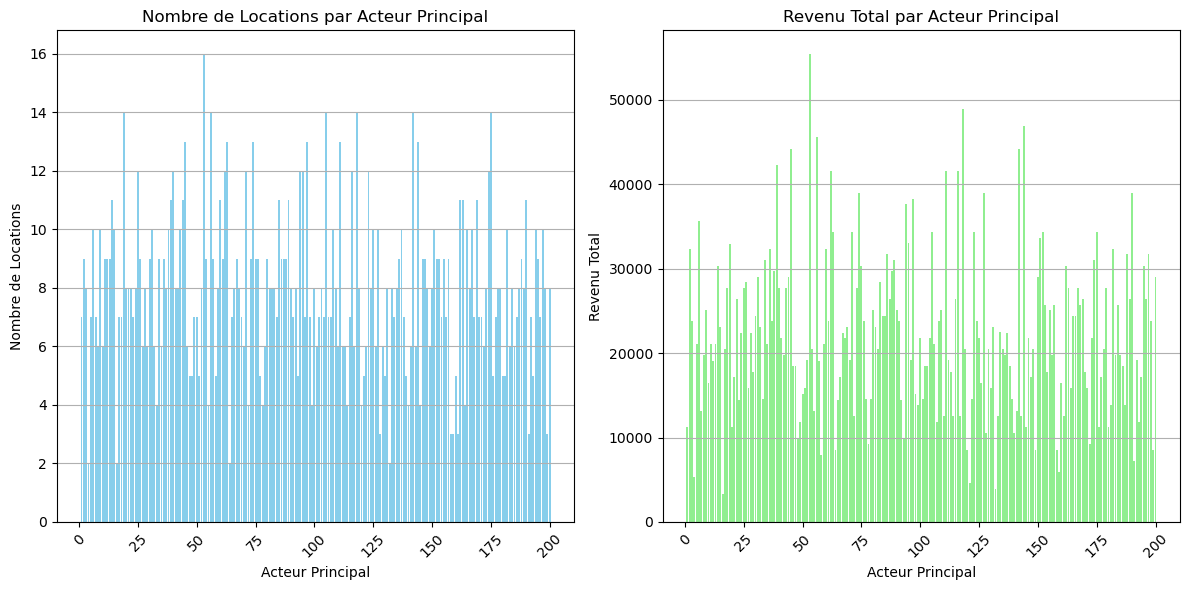

Performance des Acteurs Principaux :
     acteur_principal  nombre_locations  revenu_total  revenu_moyen
0                   1                 7     11195.809   1599.401286
1                   2                 9     32344.183   3593.798111
2                   3                 8     23753.896   2969.237000
3                   4                 2      5277.174   2638.587000
4                   5                 7     21115.309   3016.472714
..                ...               ...           ...           ...
195               196                 7     26405.709   3772.244143
196               197                10     31676.270   3167.627000
197               198                 8     23753.896   2969.237000
198               199                 3      8577.061   2859.020333
199               200                 8     29044.296   3630.537000

[200 rows x 4 columns]
Les performances des acteurs ont ete exportees vers 'performance_acteurs.csv'


In [478]:
# Etape 1: Evaluation de la performance des acteurs
performance_acteurs = df_africa.groupby('acteur_principal').agg({
    'id_location': 'count',  # Nombre de locations
    'montant_f_cfa': 'sum'   # Revenus totaux generes
}).reset_index().rename(columns={'id_location': 'nombre_locations', 'montant_f_cfa': 'revenu_total'})

# Etape 2: Calcul de la performance par location
performance_acteurs['revenu_moyen'] = performance_acteurs['revenu_total'] / performance_acteurs['nombre_locations']

# Etape 3: Visualisation des resultats
plt.figure(figsize=(12, 6))

# Sous-graphe pour le nombre de locations
plt.subplot(1, 2, 1)
plt.bar(performance_acteurs['acteur_principal'], performance_acteurs['nombre_locations'], color='skyblue')
plt.title('Nombre de Locations par Acteur Principal')
plt.xlabel('Acteur Principal')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Sous-graphe pour le revenu total
plt.subplot(1, 2, 2)
plt.bar(performance_acteurs['acteur_principal'], performance_acteurs['revenu_total'], color='lightgreen')
plt.title('Revenu Total par Acteur Principal')
plt.xlabel('Acteur Principal')
plt.ylabel('Revenu Total')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Affichage des performances des acteurs
print("Performance des Acteurs Principaux :")
print(performance_acteurs)

# Etape 4: Export des performances des acteurs dans un fichier CSV
performance_acteurs.to_csv('performance_acteurs.csv', index=False, encoding='utf-8')
print("Les performances des acteurs ont ete exportees vers 'performance_acteurs.csv'")


<h3 style="color: green;"> 1-4-3 Adaptation des offres en fonction des tendances locales </h3>

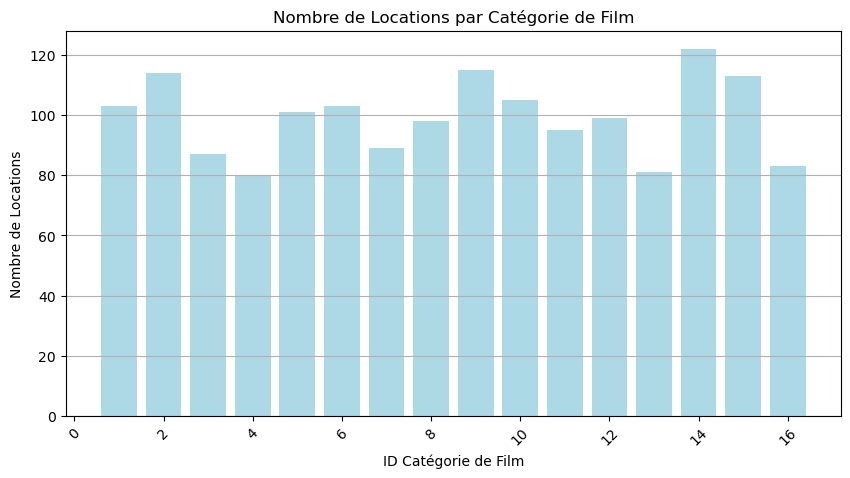

Les tendances locales ont ete exportees vers 'tendances_locales.csv'


In [479]:
# Etape 1: Identification des tendances locales par categorie de film
tendances_locales = df_africa.groupby('id_categorie_film').agg({
    'id_location': 'count',  # Nombre de locations
    'montant_f_cfa': 'sum'         # Revenus totaux generes
}).reset_index().rename(columns={'id_location': 'nombre_locations', 'montant_f_cfa': 'revenu_total'})

# Etape 2: Adaptation des offres en fonction des tendances
# Ajout d'une colonne pour la recommandation d'offre basee sur le revenu
tendances_locales['recommandation'] = tendances_locales['revenu_total'].apply(lambda x: 'Offre Premium' if x > 500000 else 'Offre Standard')

# Etape 3: Visualisation des tendances
plt.figure(figsize=(10, 5))
plt.bar(tendances_locales['id_categorie_film'], tendances_locales['nombre_locations'], color='lightblue')
plt.title('Nombre de Locations par Catégorie de Film')
plt.xlabel('ID Catégorie de Film')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Etape 4: Export des resultats dans un fichier CSV
tendances_locales.to_csv('tendances_locales.csv', index=False, encoding='utf-8')
print("Les tendances locales ont ete exportees vers 'tendances_locales.csv'")

<h2 style="color: green;">  1-5 GESTION DE LA RETENTION ET MINIMISATION DU CHURN (ATTRITION)</h2>


<h3 style="color: green;"> 1-5-1 Identification des clients avec des comportements de location irréguliers ou en déclin pour anticiper le risque de désabonnement </h3>

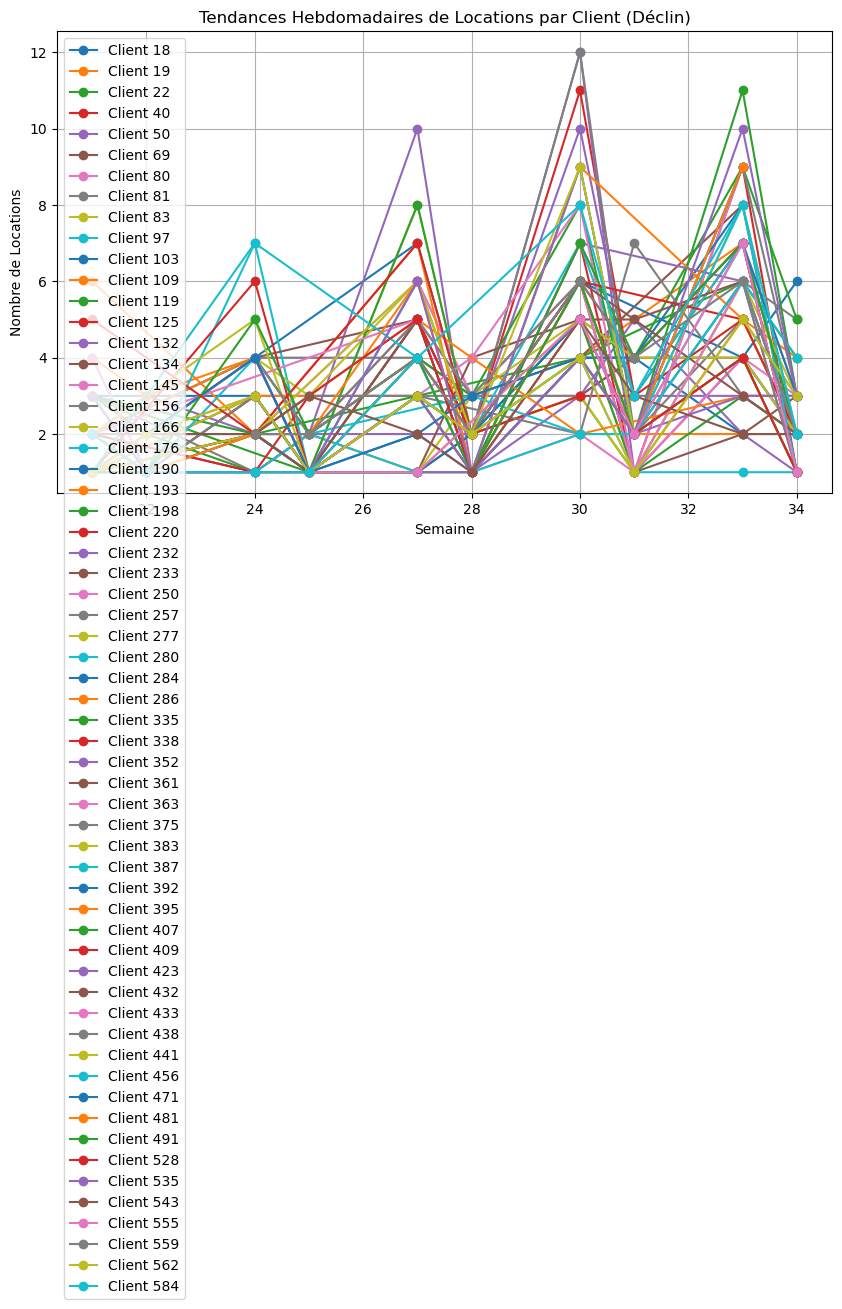

Clients a risque de désabonnement :
     id_client    prenom  annee  semaine  nombre_locations  montant_f_cfa  \
2           18     CAROL   2022       25                 1       5945.087   
4           18     CAROL   2022       28                 2       2631.974   
7           18     CAROL   2022       33                 2       1309.374   
9           19      RUTH   2022       24                 2       3954.574   
10          19      RUTH   2022       25                 1       1977.287   
..         ...       ...    ...      ...               ...            ...   
491        562   WALLACE   2022       31                 1       4622.487   
493        562   WALLACE   2022       34                 3       5270.561   
495        584  SALVADOR   2022       22                 1       3299.887   
500        584  SALVADOR   2022       31                 3       7254.461   
502        584  SALVADOR   2022       34                 2       1970.674   

     variation_locations  
2           

In [480]:
# Etape 1: Extraction de l'annee et de la semaine
df_africa['annee'] = df_africa['date_location'].dt.isocalendar().year
df_africa['semaine'] = df_africa['date_location'].dt.isocalendar().week

# Etape 2: Calcul du nombre de locations hebdomadaires par client
locations_hebdo = df_africa.groupby(['id_client', 'prenom', 'annee', 'semaine']).agg({
    'id_location': 'count',    # Nombre de locations par semaine
    'montant_f_cfa': 'sum'           # Total dépensé par semaine
}).reset_index().rename(columns={'id_location': 'nombre_locations'})

# Etape 3: Identification des clients a comportement irregulier ou en declin
# Ajout de la variation du nombre de locations par client
locations_hebdo['variation_locations'] = locations_hebdo.groupby('id_client')['nombre_locations'].diff().fillna(0)

# Filtre des clients avec des comportements en declin (variation negative)
clients_a_risque = locations_hebdo[locations_hebdo['variation_locations'] < 0]

# Etape 4: Visualisation (optionnel)
plt.figure(figsize=(10, 6))
for client in clients_a_risque['id_client'].unique():
    data_client = locations_hebdo[locations_hebdo['id_client'] == client]
    plt.plot(data_client['semaine'], data_client['nombre_locations'], marker='o', label=f'Client {client}')
plt.xlabel('Semaine')
plt.ylabel('Nombre de Locations')
plt.title('Tendances Hebdomadaires de Locations par Client (Déclin)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Affichage des clients a risque
print("Clients a risque de désabonnement :")
print(clients_a_risque)

# Export des resultats dans un fichier CSV
clients_a_risque.to_csv('clients_a_risque_desabonnement.csv', index=False, encoding='utf-8')
print("Les resultats ont ete exportes vers 'clients_a_risque_desabonnement.csv'")

<h2 style="color: green;">  1-6 OPTIMISATION DES OFFRES ET PROMOTIONS BASEES SUR LE COMPORTEMENT DES CLIENTS</h2>


<h3 style="color: green;"> 1-6-1 Mise en place des offres dynamiques adaptées à l'historique des locations (réductions sur les abonnements fréquents) </h3>

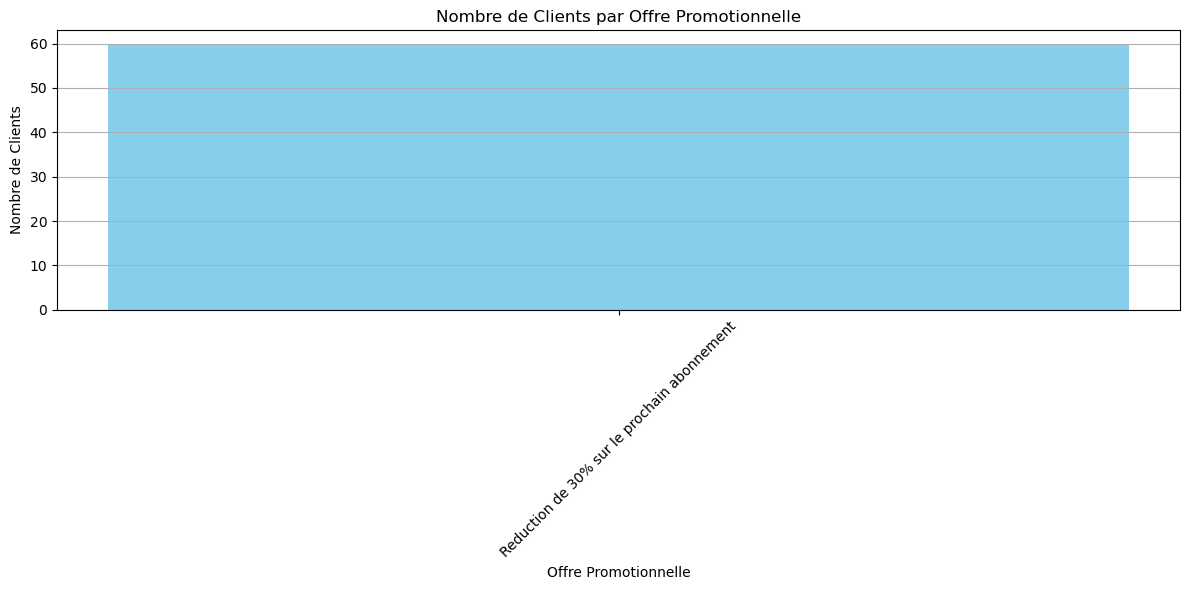

Offres promotionnelles proposées :
    id_client     prenom        nom  nombre_locations  total_depense  \
0          18      CAROL     GARCIA                22      60694.114   
1          19       RUTH   MARTINEZ                24      83165.088   
2          22      LAURA  RODRIGUEZ                21      71942.827   
3          40     AMANDA     CARTER                27      73225.749   
4          50      DIANE    COLLINS                35     112189.545   
5          69       JUDY       GRAY                24      63326.088   
6          80    MARILYN       ROSS                29      89083.723   
7          81     ANDREA  HENDERSON                22      62016.714   
8          83     LOUISE    JENKINS                24      63987.388   
9          97      ANNIE    RUSSELL                18      38897.666   
10        103     GLADYS   HAMILTON                31      97006.097   
11        109       EDNA       WEST                26      71248.462   
12        119     SHERRY   MA

In [481]:
# Etape 1: Calcul du nombre de locations par client et le montant total depense
historique_locations = df_africa.groupby(['id_client', 'prenom', 'nom', 'email']).agg({ 
    'id_location': 'count',   # Nombre de locations par client
    'montant_f_cfa': 'sum'          # Montant total depense par client
}).reset_index().rename(columns={'id_location': 'nombre_locations', 'montant_f_cfa': 'total_depense'})

# Etape 2: Definition des offres dynamiques basees sur le nombre de locations
def definir_offre(row):
    if row['nombre_locations'] >= 10:  # Abonnements fréquents
        return "Reduction de 30% sur le prochain abonnement"
    elif row['nombre_locations'] >= 5:
        return "Reduction de 15% sur le prochain abonnement"
    else:
        return "Aucune offre"

historique_locations['offre_promotionnelle'] = historique_locations.apply(definir_offre, axis=1)

# Etape 3: Visualisation des resultats
plt.figure(figsize=(12, 6))
offres_counts = historique_locations['offre_promotionnelle'].value_counts()
plt.bar(offres_counts.index, offres_counts.values, color='skyblue')
plt.title('Nombre de Clients par Offre Promotionnelle')
plt.xlabel('Offre Promotionnelle')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Affichage du graphique
plt.show()

# Affichage des resultats
print("Offres promotionnelles proposées :")
print(historique_locations[['id_client', 'prenom', 'nom', 'nombre_locations', 'total_depense', 'offre_promotionnelle']])

# Etape 4: Export des resultats dans un fichier CSV
historique_locations.to_csv('offres_promotionnelles_clients.csv', index=False, encoding='utf-8')
print("Les résultats ont été exportés dans 'offres_promotionnelles_clients.csv'")


<h3 style="color: green;"> 1-6-2 Creation des campagnes promotionnelles ciblees dans les villes moins actives (total revenu trimestriel inferieur a 1.000.000 F CFA) pour augmenter l’engagement </h3>

Les campagnes promotionnelles ont été exportées dans 'campagnes_promotionnelles.csv'


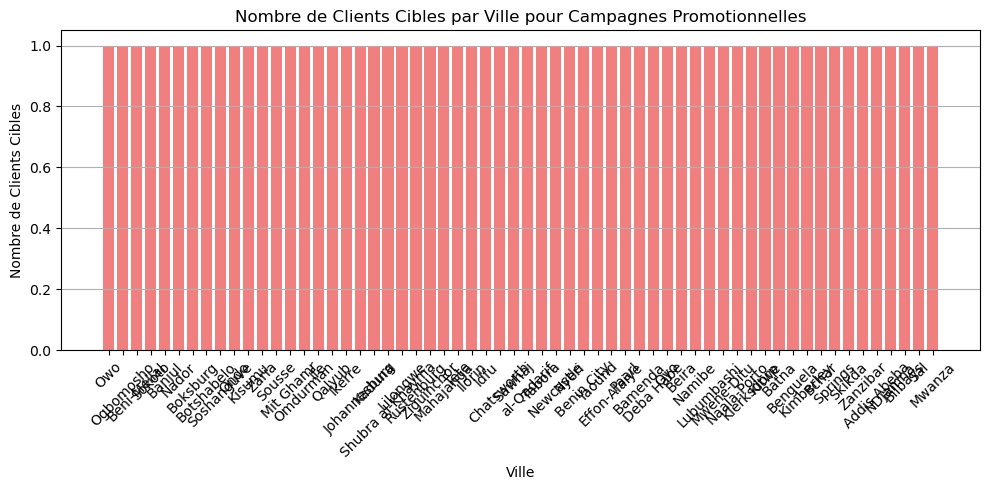

In [482]:
# Etape 1: Calculons le revenu total par region
activite_region = df_africa.groupby(['id_ville', 'ville']).agg({
    'montant_f_cfa': 'sum'
}).reset_index().rename(columns={'montant_f_cfa': 'total_revenu'})

# Etape 2: Identification des regions moins actives
regions_moins_actives = activite_region[activite_region['total_revenu'] < 1000000]

# Etape 3: Preparation des campagnes promotionnelles
def definir_offre(region):
    return "Abonnement gratuit 15 jours"  # Offres pour les regions avec un revenu total inferieur à 1.000.000 F CFA

regions_moins_actives['offre_promotionnelle'] = regions_moins_actives.apply(definir_offre, axis=1)

# Etape 4: Fusion avec la base client pour ciblage
clients_ciblees = pd.merge(df_africa[['id_client', 'id_ville', 'ville']].drop_duplicates(), 
                             regions_moins_actives[['id_ville', 'ville', 'offre_promotionnelle']], 
                             on=['id_ville', 'ville'], how='inner')

# Export pour integration CRM
clients_ciblees[['id_client', 'ville', 'offre_promotionnelle']].to_csv('campagnes_promotionnelles.csv', index=False, encoding='utf-8')
print("Les campagnes promotionnelles ont été exportées dans 'campagnes_promotionnelles.csv'")

# Etape 5: Visualisation des resultats
plt.figure(figsize=(10, 5))
region_counts = clients_ciblees['ville'].value_counts()
plt.bar(region_counts.index, region_counts.values, color='lightcoral')
plt.title('Nombre de Clients Cibles par Ville pour Campagnes Promotionnelles')
plt.xlabel('Ville')
plt.ylabel('Nombre de Clients Cibles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Affichage du graphique
plt.show()


<h3 style="color: green;"> 1-6-3 Mesure de l’impact des campagnes promotionnelles sur le montant moyen des locations (Absence de donnees sur les campagnes promotionnelles) </h3>

<h2 style="color: green;"> 1-7 ANALYSE DU COMPORTEMENT DE CONSOMMATION PAR LANGUE ET CATEGORIE DE CONTENU</h2>


<h3 style="color: green;"> 1-7-1 Identification des catégories et langues de films préférées par semaine et par pays </h3>

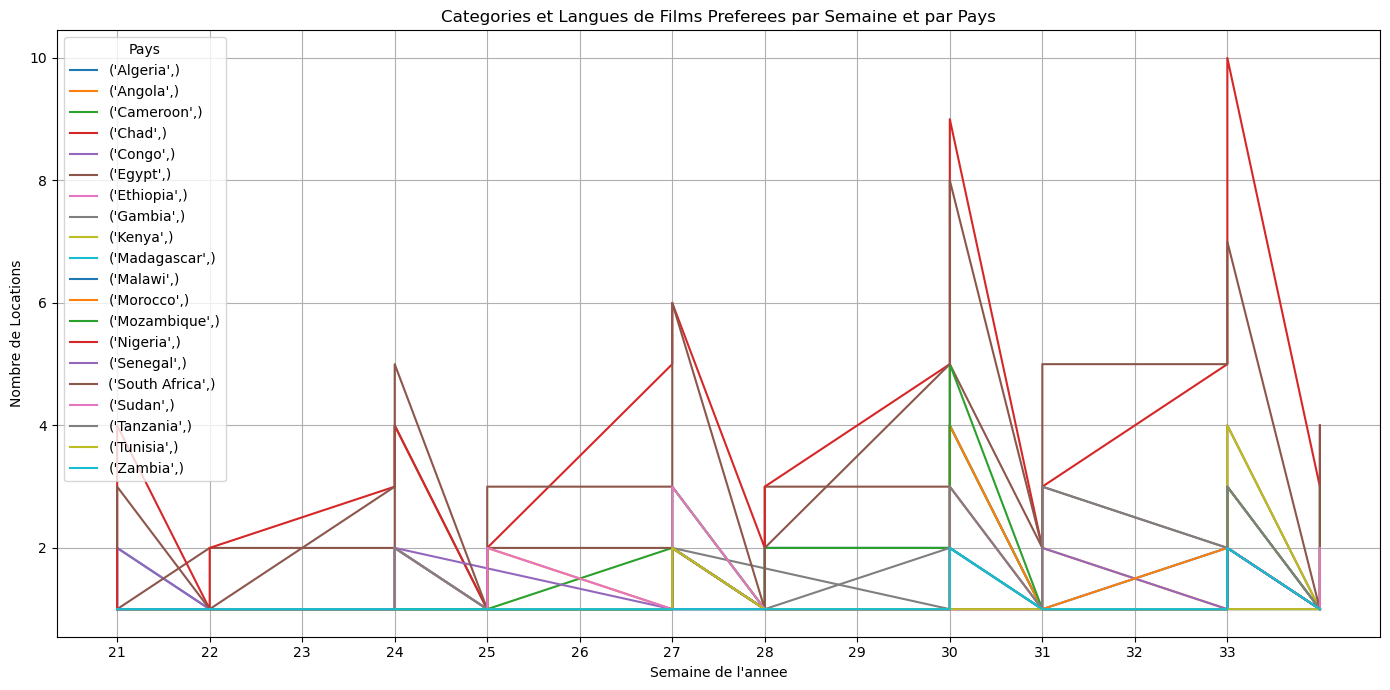

Les résultats ont été exportés dans 'preferences_film_semaine_pays.csv'
Préférences de films par semaine et pays :
     annee  semaine          pays  id_categorie_film  id_langue_film  \
957   2022       34       Nigeria                  5               1   
961   2022       34       Nigeria                 10               1   
979   2022       34  South Africa                 15               1   
926   2022       34         Egypt                 14               1   
951   2022       34    Mozambique                  6               1   
..     ...      ...           ...                ...             ...   
73    2022       21      Tanzania                  1               1   
74    2022       21      Tanzania                  6               1   
75    2022       21      Tanzania                 12               1   
76    2022       21      Tanzania                 14               1   
77    2022       21        Zambia                  9               1   

     nombre_location

In [483]:

# Etape 1: Regroupement par semaine, pays, categorie de film et langue de film
preferences = df_africa.groupby(['annee', 'semaine', 'pays', 'id_categorie_film', 'id_langue_film']).size().reset_index(name='nombre_locations')

# Etape 2: Identification des categories et langues de films les plus populaires par pays

top_preferences = preferences.sort_values(['annee', 'semaine', 'nombre_locations'], ascending=False).groupby(['annee', 'semaine', 'pays']).head(5)

# Etape 3: Visualisation des resultats
plt.figure(figsize=(14, 7))
for key, grp in top_preferences.groupby(['pays']):
    plt.plot(grp['semaine'], grp['nombre_locations'], label=key)

plt.title('Categories et Langues de Films Preferees par Semaine et par Pays')
plt.xlabel('Semaine de l\'annee')
plt.ylabel('Nombre de Locations')
plt.xticks(range(21, 34))  
plt.legend(title='Pays')
plt.grid()
plt.tight_layout()

# Afficher le graphique
plt.show()

# Étape 6: Exporter les résultats dans un fichier CSV
top_preferences.to_csv('preferences_film_semaine_pays.csv', index=False, encoding='utf-8')
print("Les résultats ont été exportés dans 'preferences_film_semaine_pays.csv'")

# Afficher les résultats
print("Préférences de films par semaine et pays :")
print(top_preferences)


# <h1 style="color: blue;">2 - LES INSIGHTS MARKETING : POUR L’AJUSTEMENT DYNAMIQUE DES CAMPAGNES PUBLICITAIRES ET MAXIMISATION DE L’ENGAGEMENT UTILISATEUR</h1>


<h2 style="color: blue;"> 2-1 CIBLAGE GEOGRAPHIQUE PRECIS POUR LA PUBLICITE LOCALISEE</h2>



<h3 style="color: blue;"> 2-1-1 Adaptation des campagnes publicitaires aux pays spécifiques en fonction des contenus populaires localement (Ex mise en avant des films locaux au Nigeria)</h3>

In [484]:
# Filtre des donnees pour les clients au Nigeria
df_nigeria = df_africa[df_africa['pays'] == 'Nigeria']

# Conversion des colonnes en chaines de caracteres pour permettre la concatenation
popular_content_nigeria['id_categorie_film'] = popular_content_nigeria['id_categorie_film'].astype(str)
popular_content_nigeria['id_langue_film'] = popular_content_nigeria['id_langue_film'].astype(str)

# Visualisation des films les plus populaires par categorie et langue
plt.figure(figsize=(12, 6))
plt.barh(
    popular_content_nigeria['id_categorie_film'] + " - " + popular_content_nigeria['id_langue_film'],
    popular_content_nigeria['nombre_de_locations'],
    color='orange'
)
plt.xlabel("Nombre de Locations")
plt.ylabel("Categorie - Langue")
plt.title("Films populaires au Nigeria par Categorie et Langue")
plt.gca().invert_yaxis()
plt.show()


# Export des resultats en CSV
popular_content_nigeria.to_csv('contenus_populaires_nigeria.csv', index=False)


NameError: name 'popular_content_nigeria' is not defined

<h3 style="color: blue;"> 2-1-2 Priorisation des investissements publicitaires dans les pays a fort potentiel non exploite pour attirer de nouveaux utilisateurs </h3>

<h3 style="color: blue;"> 2-1-3 Lancement des campagnes multilingues adaptées aux pays afin de toucher un public plus large </h3>

            pays  id_langue_film  nombre_de_locations
0        Algeria               1                   88
1         Angola               1                   52
2       Cameroon               1                   51
3           Chad               1                   32
4          Congo               1                   50
5          Egypt               1                  161
6       Ethiopia               1                   23
7         Gambia               1                   30
8          Kenya               1                   53
9     Madagascar               1                   22
10        Malawi               1                   28
11       Morocco               1                   70
12    Mozambique               1                   80
13       Nigeria               1                  349
14       Senegal               1                   25
15  South Africa               1                  284
16         Sudan               1                   54
17      Tanzania            

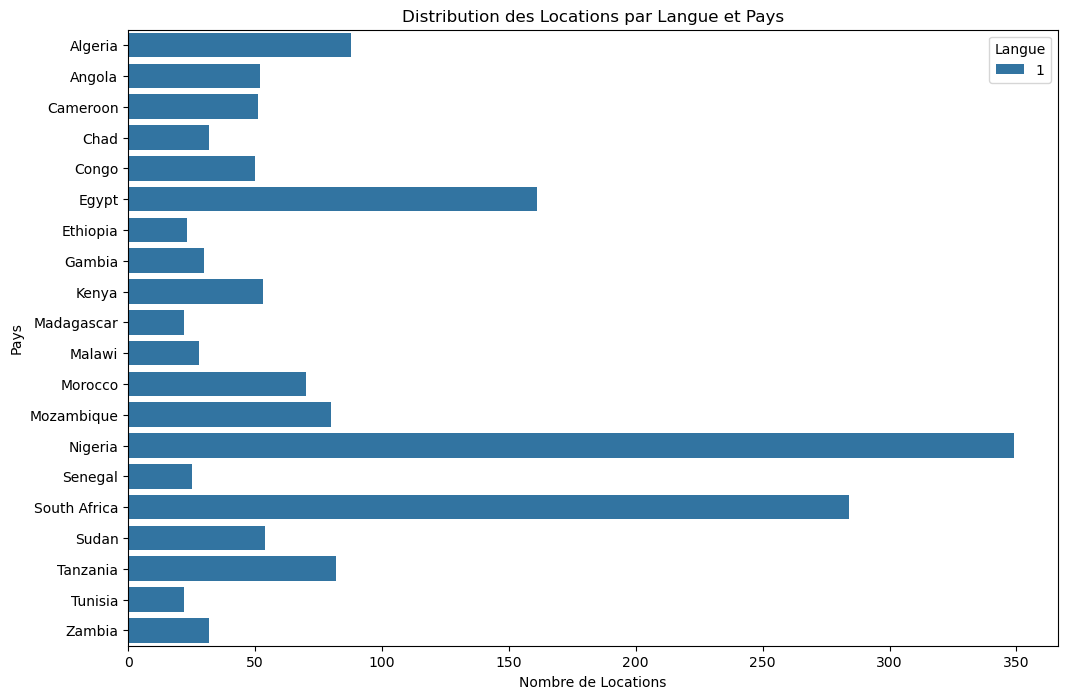

In [485]:
# Calcul du nombre de locations par pays et langue
distribution_langue_pays = df_africa.groupby(['pays', 'id_langue_film']).size().reset_index(name='nombre_de_locations')
print(distribution_langue_pays)

# Filtrage des langues dominantes par pays
langues_dominantes = distribution_langue_pays.loc[distribution_langue_pays.groupby('pays')['nombre_de_locations'].idxmax()]
print(langues_dominantes)


plt.figure(figsize=(12, 8))
sns.barplot(data=distribution_langue_pays, x='nombre_de_locations', y='pays', hue='id_langue_film')
plt.xlabel("Nombre de Locations")
plt.ylabel("Pays")
plt.title("Distribution des Locations par Langue et Pays")
plt.legend(title="Langue")
plt.show()


<h2 style="color: blue;"> 2-2 AJUSTEMENT DES CAMPAGNES EN FONCTION DE LA SAISONNALITE ET DES EVENEMENTS</h2>






<h3 style="color: blue;"> 2-2-1 Analyse des periodes a fort engagement (les jours de la semaine) pour diffuser plus d’annonces pertinentes et maximiser l’audience

  jour_semaine  nombre_locations
5      Tuesday               238
6    Wednesday               238
4     Thursday               233
3       Sunday               229
2     Saturday               222
0       Friday               214
1       Monday               214
    periode  nombre_locations
0   Semaine              1137
1  Week-end               451


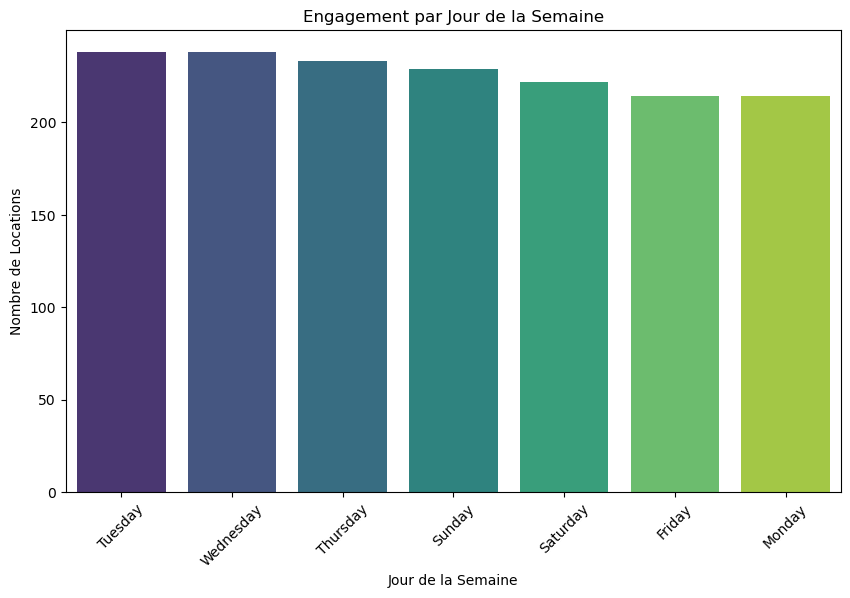

In [486]:
# Conversion de la colonne 'date_location' en jour de la semaine
df_africa['jour_semaine'] = pd.to_datetime(df_africa['date_location']).dt.day_name()


# Compt du nombre de locations pour chaque jour de la semaine
engagement_par_jour = df_africa.groupby('jour_semaine').size().reset_index(name='nombre_locations')
engagement_par_jour = engagement_par_jour.sort_values(by='nombre_locations', ascending=False)
print(engagement_par_jour)


# Ajout d'une colonne 'periode' pour distinguer week-end et semaine
df_africa['periode'] = df_africa['jour_semaine'].apply(lambda x: 'Week-end' if x in ['Saturday', 'Sunday'] else 'Semaine')

# Calcul de l'engagement moyen pour les week-ends et la semaine
engagement_par_periode = df_africa.groupby('periode').size().reset_index(name='nombre_locations')
print(engagement_par_periode)



plt.figure(figsize=(10, 6))
sns.barplot(x='jour_semaine', y='nombre_locations', data=engagement_par_jour, palette='viridis')
plt.xlabel("Jour de la Semaine")
plt.ylabel("Nombre de Locations")
plt.title("Engagement par Jour de la Semaine")
plt.xticks(rotation=45)
plt.show()


<h3 style="color: blue;"> 2-2-1 Analyse des periodes a fort engagement (les 30 jours du mois) pour diffuser plus d’annonces pertinentes et maximiser l’audience

    jour  nombre_de_locations
0      1                   69
1      2                   54
2      5                    1
3      6                   48
4      7                   52
5      8                   45
6      9                   45
7     10                   41
8     11                   46
9     12                   53
10    14                    4
11    15                   29
12    16                   40
13    17                   96
14    18                   95
15    19                   96
16    20                   95
17    21                  102
18    22                   63
19    23                   60
20    25                   15
21    26                   22
22    27                   91
23    28                   93
24    29                   93
25    30                   61
26    31                   79
    jour  nombre_de_locations
0      1                   69
13    17                   96
14    18                   95
15    19                   96
16    20  

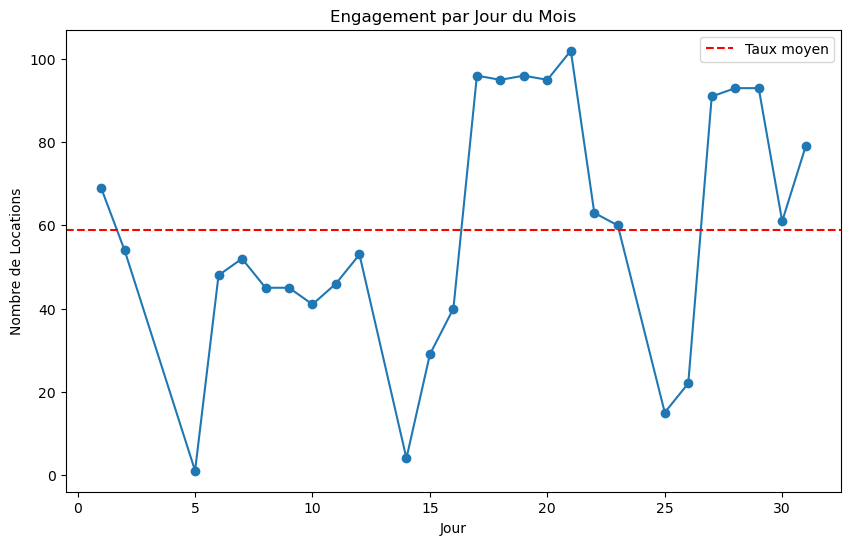

In [487]:
# Nombre de locations par jour du mois
engagement_par_jour = df_africa.groupby('jour').size().reset_index(name='nombre_de_locations')
print(engagement_par_jour)


# Calcul du taux moyen et identification des jours avec des engagements superieurs a la moyenne
taux_moyen = engagement_par_jour['nombre_de_locations'].mean()
jours_fort_engagement = engagement_par_jour[engagement_par_jour['nombre_de_locations'] > taux_moyen]
print(jours_fort_engagement)



plt.figure(figsize=(10, 6))
plt.plot(engagement_par_jour['jour'], engagement_par_jour['nombre_de_locations'], marker='o')
plt.axhline(y=taux_moyen, color='r', linestyle='--', label='Taux moyen')
plt.title("Engagement par Jour du Mois")
plt.xlabel("Jour")
plt.ylabel("Nombre de Locations")
plt.legend()
plt.show()


<h3 style="color: blue;"> 2-2-2 Lancement des offres limitées dans le temps pour creer un sentiment d’urgence et booster l’engagement pendant les periodes creuses

In [488]:
# Calcul du nombre de locations par mois et par jour
engagement_par_mois = df_africa.groupby('mois').size().reset_index(name='nombre_de_locations')
engagement_par_jour = df_africa.groupby('jour').size().reset_index(name='nombre_de_locations')


# Definition de la moyenne d'engagement et identification des periodes creuses
moyenne_mois = engagement_par_mois['nombre_de_locations'].mean()
periodes_creuses = engagement_par_mois[engagement_par_mois['nombre_de_locations'] < moyenne_mois]
print(periodes_creuses)


# Creation d'une notification d'offre sur les jours de faible engagement
jours_faible_engagement = engagement_par_jour[engagement_par_jour['nombre_de_locations'] < engagement_par_jour['nombre_de_locations'].mean()]

# Creation d'une alerte ou d'une action sur ces jours
for index, row in jours_faible_engagement.iterrows():
    jour = row['jour']
    print(f"Lancer une offre limitée le jour {jour} du mois pour stimuler l'engagement !")


   mois  nombre_de_locations
0     5                  125
1     6                  222
Lancer une offre limitée le jour 2 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 5 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 6 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 7 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 8 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 9 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 10 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 11 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 12 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 14 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 15 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 16 du mois pour stimuler l'engagement !
Lancer une offre limitée le jour 25 du mois

<h2 style="color: blue;">  2-3 PERSONNALISATION DES PUBLICITES BASEES SUR LES PREFERENCES UTILISATEURS</h2>

<h3 style="color: blue;"> 2-3-1 Utilisation de l’historique de visionnage pour diffuser des annonces ciblées sur des films ou séries similaires

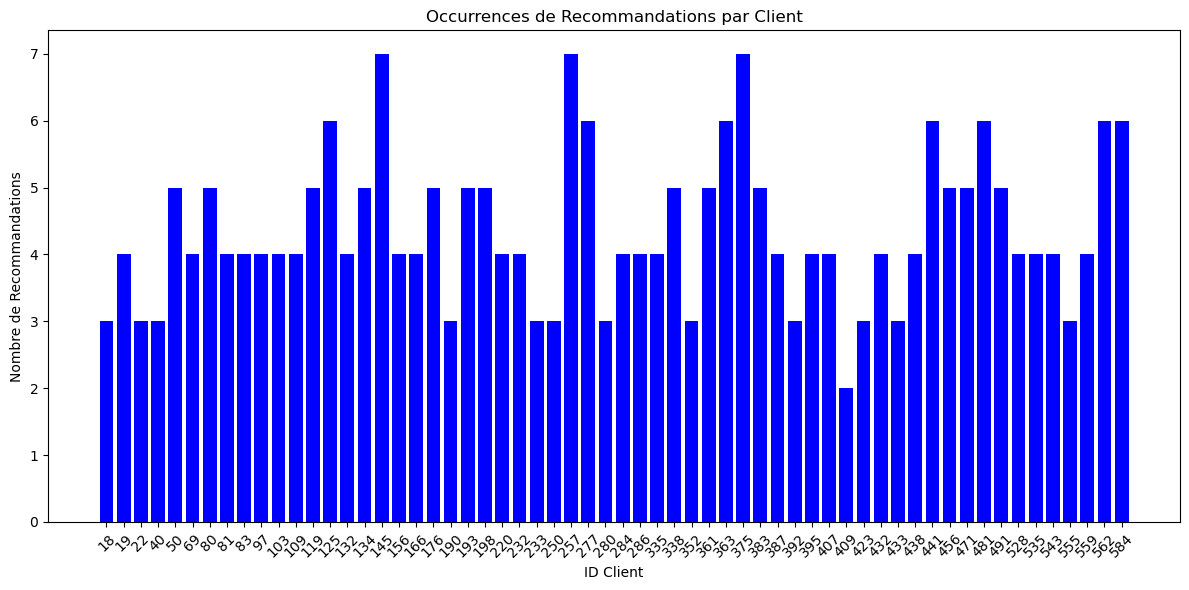

In [489]:
# Etape 1 : Creation d'un DataFrame de recommandations basé sur l'historique de visionnage

# On suppose que les contenus similaires sont determines par la meme categorie ou langue
recommandations = df_africa.groupby(['id_client', 'id_categorie_film'])['id_contenu'].count().reset_index()
recommandations.columns = ['id_client', 'id_categorie_film', 'occurrences']

# Etape 2 : Visualisation des occurrences de recommandations
plt.figure(figsize=(12, 6))
plt.bar(recommandations['id_client'].astype(str), recommandations['occurrences'], color='blue')
plt.title('Occurrences de Recommandations par Client')
plt.xlabel('ID Client')
plt.ylabel('Nombre de Recommandations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Étape 3 : Exporter le DataFrame de recommandations en CSV
recommandations.to_csv('recommandations_clients.csv', index=False)


<h3 style="color: blue;"> 2-3-2 Mise en avant des acteurs et categorie_film populaires via des publicités personnalisées pour encourager l’engagement

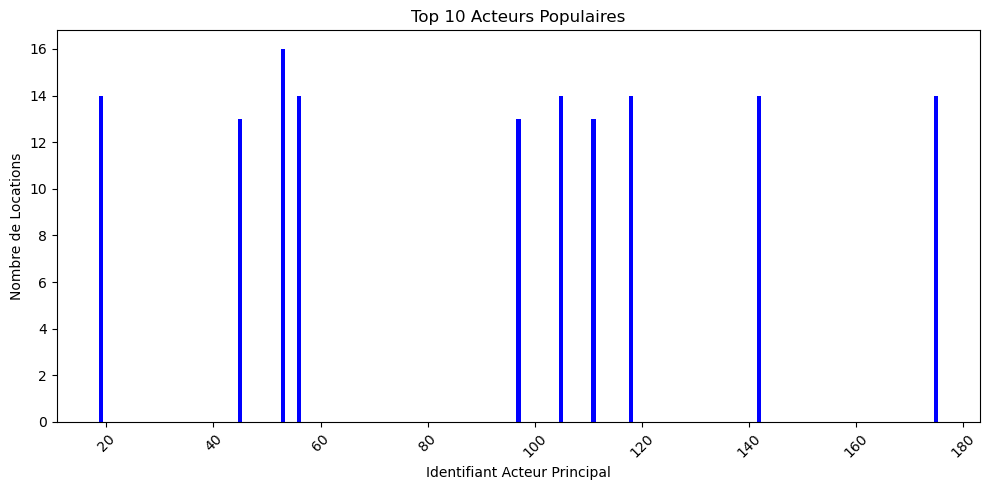

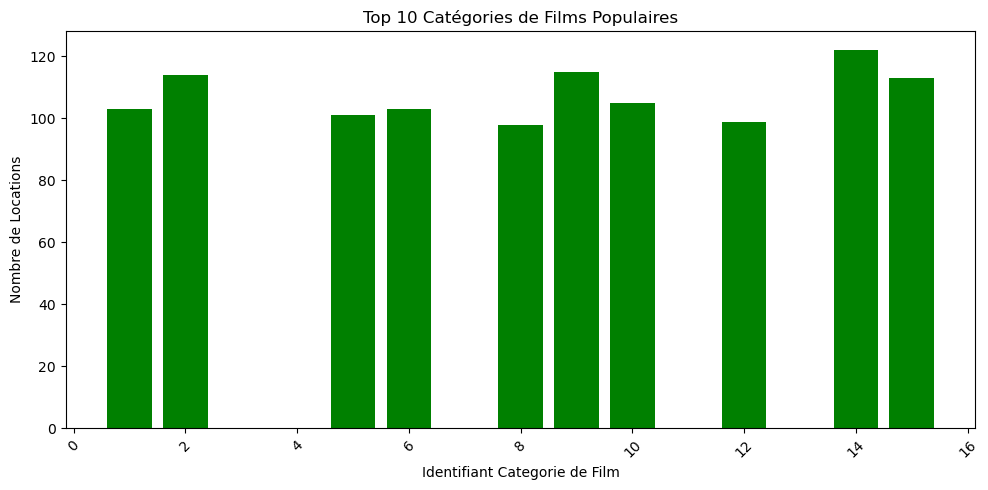

In [490]:
# Etape 1 : Analyse des acteurs populaires
acteurs_populaires = df_africa['acteur_principal'].value_counts().reset_index()
acteurs_populaires.columns = ['acteur_principal', 'nombre_locations']
top_acteurs = acteurs_populaires.head(10)  # Prendre les 10 acteurs les plus populaires

# Etape 2 : Analyse des categories de films populaires
categories_populaires = df_africa['id_categorie_film'].value_counts().reset_index()
categories_populaires.columns = ['id_categorie_film', 'nombre_locations']
top_categories = categories_populaires.head(10)  # Prendre les 10 catégories les plus populaires

# Etape 3 : Creation d'un DataFrame de publicites
publicites = pd.merge(top_acteurs, top_categories, how='cross')  # Combinaison croisée

# Etape 4 : Export d'un DataFrame de publicités en CSV
publicites.to_csv('publicites_personnalisees.csv', index=False)

# Etape 5 : Visualisation des resultats
# Graphique des acteurs populaires
plt.figure(figsize=(10, 5))
plt.bar(top_acteurs['acteur_principal'], top_acteurs['nombre_locations'], color='blue')
plt.title('Top 10 Acteurs Populaires')
plt.xlabel('Identifiant Acteur Principal')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Graphique des categories populaires
plt.figure(figsize=(10, 5))
plt.bar(top_categories['id_categorie_film'], top_categories['nombre_locations'], color='green')
plt.title('Top 10 Catégories de Films Populaires')
plt.xlabel('Identifiant Categorie de Film')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2 style="color: blue;"> 2-4 PROMOTION DES CONTENUS POPULAIRES ET TENDANCES EMERGENTES</h2>





<h3 style="color: blue;"> 2-4-1 Promotion des nouveaux contenus en se basant sur ceux qui sont déjà appréciés par le même public cible

In [491]:
# Etape 1 : Identification des contenus apprecies par les clients
contenus_appricies = df_africa.groupby(['id_client', 'id_categorie_film', 'id_contenu'])['id_location'].count().reset_index()
contenus_appricies.columns = ['id_client', 'id_categorie_film', 'id_contenu', 'nombre_locations']

# Etape 2 : Identification des clients qui ont aimé le meme contenu
# Pour chaque contenu apprécié, trouvons d'autres contenus dans la meme categorie
recommandations = pd.merge(contenus_appricies, df_africa[['id_contenu', 'id_categorie_film']], on='id_categorie_film', how='inner')
recommandations = recommandations[recommandations['id_contenu_x'] != recommandations['id_contenu_y']]  

# Etape 3 : Creation d'une liste de recommandations
recommandations_finales = recommandations[['id_client', 'id_contenu_y']].drop_duplicates()
recommandations_finales.columns = ['id_client', 'id_contenu_recommande']

# Etape 4 : Export des recommandations en CSV
recommandations_finales.to_csv('recommandations_nouveaux_contenus.csv', index=False)




<h3 style="color: blue;"> 2-4-2 Création des campagnes centrées sur des acteurs populaires pour renforcer l’attractivité des nouveaux contenus associés

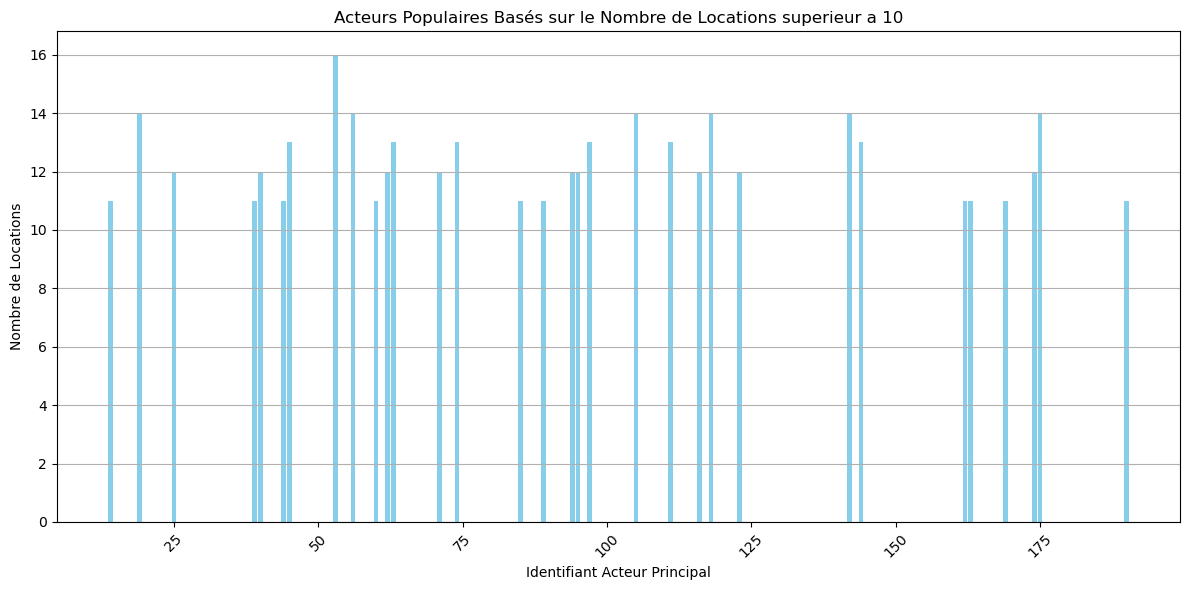

In [492]:
# Etape 1 : Identification des acteurs populaires en fonction des locations
acteurs_populaires = df_africa.groupby('acteur_principal')['id_location'].count().reset_index()
acteurs_populaires.columns = ['acteur_principal', 'nombre_locations']
acteurs_populaires = acteurs_populaires.sort_values(by='nombre_locations', ascending=False)

# Etape 2 : Creation d'un DataFrame de campagnes
# On peut filtrer les acteurs qui ont plus d'une certaine limite de locations
limite = 10  # Acteurs avec plus de 10 locations
acteurs_cibles = acteurs_populaires[acteurs_populaires['nombre_locations'] > limite]

# Etape 3 : Visualisation des donnees
plt.figure(figsize=(12, 6))
plt.bar(acteurs_cibles['acteur_principal'], acteurs_cibles['nombre_locations'], color='skyblue')
plt.title('Acteurs Populaires Basés sur le Nombre de Locations superieur a 10')
plt.xlabel('Identifiant Acteur Principal')
plt.ylabel('Nombre de Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Etape 4 : Affichage du graphique
plt.show()

# Export des donnees des acteurs cibles pour les campagnes
acteurs_cibles.to_csv('acteurs_populaires_campagnes.csv', index=False)


<h2 style="color: blue;"> 2-5 OPTIMISATION EN TEMPS REEL DES PERFORMANCES PUBLICITAIRES (DONNEES DES CAMPAGNES PUB NON DISPO)</h2>


<h3 style="color: blue;"> 2-5-1 Analyse du retour sur investissement (ROI) des campagnes en temps réel en suivant le montant généré par contenu promu

<h3 style="color: blue;"> 2-5-2 Ajustement les budgets publicitaires dynamiquement selon les performances : allouer plus de budget aux campagnes qui génèrent le plus d’engagement ou de revenus

<h3 style="color: blue;"> 2-5-3 Utilisation des A/B tests pour comparer les performances de plusieurs campagnes et optimiser les annonces en continu

<h2 style="color: blue;"> 2-6  REACTIVATION DES UTILISATEURS INACTIFS VIA DES CAMPAGNES CIBLEES</h2>



<h3 style="color: blue;"> 2-6-1 Identification des utilisateurs inactifs pendant 1 mois (30 jours) et leur envoyer des offres personnalisées (réductions, accès gratuit à du contenu exclusif) pour les réactiver

In [493]:

from datetime import datetime, timedelta

# Etape 1 : Definition de la periode d'inactivite (30 jours)
date_limite = datetime.now() - timedelta(days=30)

# Etape 2 : Extraction des utilisateurs inactifs
utilisateurs_inactifs = df_africa[df_africa['date_location'] < date_limite]

# Recuperation des informations uniques des utilisateurs inactifs
utilisateurs_inactifs_uniques = utilisateurs_inactifs[['id_client', 'prenom', 'nom', 'email']].drop_duplicates()

# Etape 3 : Creation des offres personnalisees
# Exemple simple d'offres basees sur le montant moyen de location
offres = []
for index, row in utilisateurs_inactifs_uniques.iterrows():
    offre = {
        'id_client': row['id_client'],
        'prenom': row['prenom'],
        'nom': row['nom'],
        'email': row['email'],
        'offre': 'Réduction de 20% sur votre prochaine location'  
    }
    offres.append(offre)

# Conversion des offres en DataFrame
df_offres = pd.DataFrame(offres)

# Etape 4 : Preparation de la base de donnees d'offres
df_offres.to_csv('offres_utilisateurs_inactifs_pendant_30_jours.csv', index=False)

# Etape 5 : Envoi des offres (envoi d'e-mail)
def envoyer_email(prenom, nom, email, offre):
    # Logique d'envoi d'e-mail ici (via un service d'envoi d'e-mails)
    print(f"Envoi d'un e-mail à {prenom} {nom} ({email}) avec l'offre : {offre}")

# Envoi des offres par e-mail
for index, row in df_offres.iterrows():
    envoyer_email(row['prenom'], row['nom'], row['email'], row['offre'])


Envoi d'un e-mail à TRACEY BARRETT (TRACEY.BARRETT@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à OLGA JIMENEZ (OLGA.JIMENEZ@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à ROY WHITING (ROY.WHITING@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à SONIA GREGORY (SONIA.GREGORY@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à LAWRENCE LAWTON (LAWRENCE.LAWTON@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à VELMA LUCAS (VELMA.LUCAS@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à DENNIS GILMAN (DENNIS.GILMAN@sakilacustomer.org) avec l'offre : Réduction de 20% sur votre prochaine location
Envoi d'un e-mail à ALBERT CROUSE (ALBERT.CROUSE@sakilacustomer.org) avec l'offre : Réduction 

<h3 style="color: blue;"> 2-6-2 Automatisation des campagnes de relance via email ou notifications push, basées sur des déclencheurs spécifiques (longue période d’inactivité de 15 jours)

Envoi d'un e-mail à TRACEY (TRACEY.BARRETT@sakilacustomer.org) : Bonjour TRACEY, nous avons remarqué que vous n'avez pas loué de contenu récemment. Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.
Envoi d'un e-mail à OLGA (OLGA.JIMENEZ@sakilacustomer.org) : Bonjour OLGA, nous avons remarqué que vous n'avez pas loué de contenu récemment. Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.
Envoi d'un e-mail à ROY (ROY.WHITING@sakilacustomer.org) : Bonjour ROY, nous avons remarqué que vous n'avez pas loué de contenu récemment. Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.
Envoi d'un e-mail à SONIA (SONIA.GREGORY@sakilacustomer.org) : Bonjour SONIA, nous avons remarqué que vous n'avez pas loué de contenu récemment. Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.
Envoi d'un e-mail à LAWRENCE (LAWRENCE.LAWTON@sakilacustomer.org) : Bonjour LAWREN

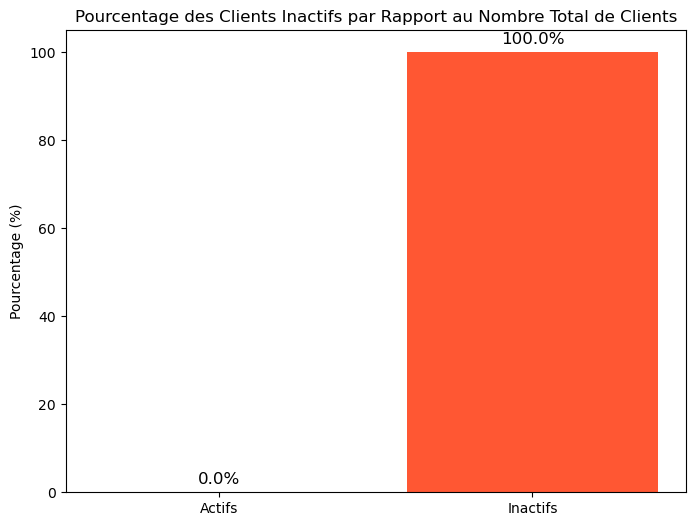

In [494]:

from datetime import datetime, timedelta



# Etape 1 : Definition de la periode d'inactivite (15 jours)
date_limite = datetime.now() - timedelta(days=15)

# Etape 2 : Extraction des utilisateurs inactifs
utilisateurs_inactifs = df_africa[df_africa['date_location'] < date_limite]

# Recuperation des informations uniques des utilisateurs inactifs
utilisateurs_inactifs_uniques = utilisateurs_inactifs[['id_client', 'prenom', 'nom', 'email']].drop_duplicates()

# Etape 3 : Sauvegarde des utilisateurs inactifs dans un fichier CSV
utilisateurs_inactifs_uniques.to_csv('utilisateurs_inactifs_pendant_15_jours.csv', index=False)

# Etape 4 : Preparation du contenu des notifications ou e-mails
def generer_contenu_email(prenom):
    return f"Bonjour {prenom}, nous avons remarqué que vous n'avez pas loué de contenu récemment. Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles."

# Etape 5 : Envoi des notifications ou e-mails
def envoyer_notification(prenom, email):
    contenu = generer_contenu_email(prenom)
    # Logique d'envoi d'e-mail ou notification (via un service d'envoi d'e-mails)
    print(f"Envoi d'un e-mail à {prenom} ({email}) : {contenu}")

# Automatisation de l'envoi des notifications
for index, row in utilisateurs_inactifs_uniques.iterrows():
    envoyer_notification(row['prenom'], row['email'])

# Etape 6 : Analyse du taux d'inactivite
total_clients = df_africa['id_client'].nunique()  # Nombre total de clients
total_inactifs = utilisateurs_inactifs_uniques['id_client'].nunique()  # Nombre total d'inactifs

# Calcul du taux d'inactivite
taux_inactivite = (total_inactifs / total_clients) * 100

# Etape 7 : Creation du graphique a barres pour le pourcentage d'inactifs
plt.figure(figsize=(8, 6))
pourcentages = [100 - taux_inactivite, taux_inactivite]  # Actifs et inactifs
labels = ['Actifs', 'Inactifs']
colors = ['#4CAF50', '#FF5733']

plt.bar(labels, pourcentages, color=colors)
plt.ylabel('Pourcentage (%)')
plt.title(f'Pourcentage des Clients Inactifs par Rapport au Nombre Total de Clients')

# Ajout du pourcentage au-dessus des barres
for i, v in enumerate(pourcentages):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12)

# Sauvegarde du graphique en fichier image
plt.savefig('pourcentage_clients_inactifs.png')

# Affichage du graphique
plt.show()


<h3 style="color: blue;"> 2-6-3 Encouragement de la reprise d’engagement en mettant en avant les nouveautés ou les contenus non terminés par l’utilisateur (sur une periode de 2 jours).

In [495]:

from datetime import datetime, timedelta



# Etape 1 : Définition de la période de reference (2 jours)
date_limite = datetime.now() - timedelta(days=30)

# Etape 2 : Filtre des nouveaux contenus
nouveaux_contenus = df_africa[df_africa['date_location'] >= date_limite]

# Etape 3 : Filtre des contenus non termines par l'utilisateur
# Supposons que l'on considere un contenu "non termine" si la date de retour est nulle
contenus_non_termines = df_africa[df_africa['date_retour'].isnull()]

# Etape 4 : Exporte lds resultats au format CSV
nouveaux_contenus.to_csv('nouveaux_contenus.csv', index=False)
contenus_non_termines.to_csv('contenus_non_termines.csv', index=False)

# Etape 5 : Les messages d'encouragement
def generer_message(prenom, nouveaux, non_termines):
    message = f"Bonjour {prenom},\n"
    if not nouveaux.empty:
        message += "Nous avons ajouté de nouveaux contenus qui pourraient vous intéresser :\n"
        for index, row in nouveaux.iterrows():
            message += f"- {row['id_contenu']} : {row['acteur_principal']} (Disponibilité: {row['date_location']})\n"
    
    if not non_termines.empty:
        message += "\nVous avez également des contenus que vous n'avez pas terminés :\n"
        for index, row in non_termines.iterrows():
            message += f"- {row['id_contenu']} : {row['acteur_principal']} (Date de location : {row['date_location']})\n"

    message += "\nNous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles."
    return message

# Etape 6 : Automatisation de l'envoi des messages
for client_id in df_africa['id_client'].unique():
    client_info = df_africa[df_africa['id_client'] == client_id].iloc[0]
    nouveaux = nouveaux_contenus[nouveaux_contenus['id_client'] == client_id]
    non_termines = contenus_non_termines[contenus_non_termines['id_client'] == client_id]
    
    message = generer_message(client_info['prenom'], nouveaux, non_termines)
    # Logique d'envoi d'e-mail ou notification (via un service d'envoi d'e-mails)
    print(f"Envoi d'un e-mail à {client_info['prenom']} ({client_info['email']}) :\n{message}\n")


Envoi d'un e-mail à TRACEY (TRACEY.BARRETT@sakilacustomer.org) :
Bonjour TRACEY,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envoi d'un e-mail à OLGA (OLGA.JIMENEZ@sakilacustomer.org) :
Bonjour OLGA,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envoi d'un e-mail à ROY (ROY.WHITING@sakilacustomer.org) :
Bonjour ROY,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envoi d'un e-mail à SONIA (SONIA.GREGORY@sakilacustomer.org) :
Bonjour SONIA,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envoi d'un e-mail à LAWRENCE (LAWRENCE.LAWTON@sakilacustomer.org) :
Bonjour LAWRENCE,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envoi d'un e-mail à VELMA (VELMA.LUCAS@sakilacustomer.org) :
Bonjour VELMA,

Nous serions ravis de vous revoir ! Profitez de nos dernières offres exceptionnelles.

Envo

<h2 style="color: green;">   1-2 PREVISION ET OPTIMISATION DES REVENUS</h2>


<h3 style="color: green;"> 1-2-1 Prevision des pics de ventes selon la semaine et planification des offres adaptees (durant 24 aout au 24 novembre 2022) </h3>

<h3 style="color: green;"> 1- Data describe </h3>

In [496]:
# Importation des packages

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


In [497]:
df_africa.columns

Index(['id_location', 'id_client', 'code_client', 'prenom', 'nom', 'email',
       'id_ville', 'ville', 'id_pays', 'pays', 'code_pays', 'id_temps',
       'date_location', 'annee', 'mois', 'jour', 'trimestre', 'id_contenu',
       'id_categorie_film', 'id_langue_film', 'acteur_principal',
       'date_retour', 'montant', 'montant_f_cfa', 'nombre_de_location',
       'semaine', 'jour_semaine', 'periode'],
      dtype='object')

In [498]:
df_africa.head()

,id_location,id_client,code_client,prenom,nom,email,id_ville,ville,id_pays,pays,...,id_categorie_film,id_langue_film,acteur_principal,date_retour,montant,montant_f_cfa,nombre_de_location,semaine,jour_semaine,periode
4,16078,280,T280B285,TRACEY,BARRETT,TRACEY.BARRETT@sakilacustomer.org,389,Owo,69,Nigeria,...,16,1,94,20220601,4.99,3299.887,19,22,Tuesday,Semaine
56,16074,277,O277J282,OLGA,JIMENEZ,OLGA.JIMENEZ@sakilacustomer.org,374,Ogbomosho,69,Nigeria,...,15,1,118,20220604,6.99,4622.487,17,21,Thursday,Semaine
87,16226,363,R363W368,ROY,WHITING,ROY.WHITING@sakilacustomer.org,372,Nyeri,52,Kenya,...,12,1,63,20220605,3.99,2638.587,25,21,Sunday,Week-end
100,16084,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,10,1,159,20220602,0.99,654.687,18,21,Friday,Semaine
101,16085,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,4,1,61,20220601,0.99,654.687,25,21,Sunday,Week-end


In [499]:
# Definition id_temps comme index de la table
df_africa.set_index('mois', inplace=True)

# Affichage les premières lignes du DataFrame
df_africa.head()


,id_location,id_client,code_client,prenom,nom,email,id_ville,ville,id_pays,pays,...,id_categorie_film,id_langue_film,acteur_principal,date_retour,montant,montant_f_cfa,nombre_de_location,semaine,jour_semaine,periode
mois,,,,,,,,,,,,,,,,,,,,,
5,16078,280,T280B285,TRACEY,BARRETT,TRACEY.BARRETT@sakilacustomer.org,389,Owo,69,Nigeria,...,16,1,94,20220601,4.99,3299.887,19,22,Tuesday,Semaine
5,16074,277,O277J282,OLGA,JIMENEZ,OLGA.JIMENEZ@sakilacustomer.org,374,Ogbomosho,69,Nigeria,...,15,1,118,20220604,6.99,4622.487,17,21,Thursday,Semaine
5,16226,363,R363W368,ROY,WHITING,ROY.WHITING@sakilacustomer.org,372,Nyeri,52,Kenya,...,12,1,63,20220605,3.99,2638.587,25,21,Sunday,Week-end
5,16084,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,10,1,159,20220602,0.99,654.687,18,21,Friday,Semaine
5,16085,284,S284G289,SONIA,GREGORY,SONIA.GREGORY@sakilacustomer.org,69,Benin City,69,Nigeria,...,4,1,61,20220601,0.99,654.687,25,21,Sunday,Week-end


<h3 style="color: green;"> 2- Identification du modele </h3>

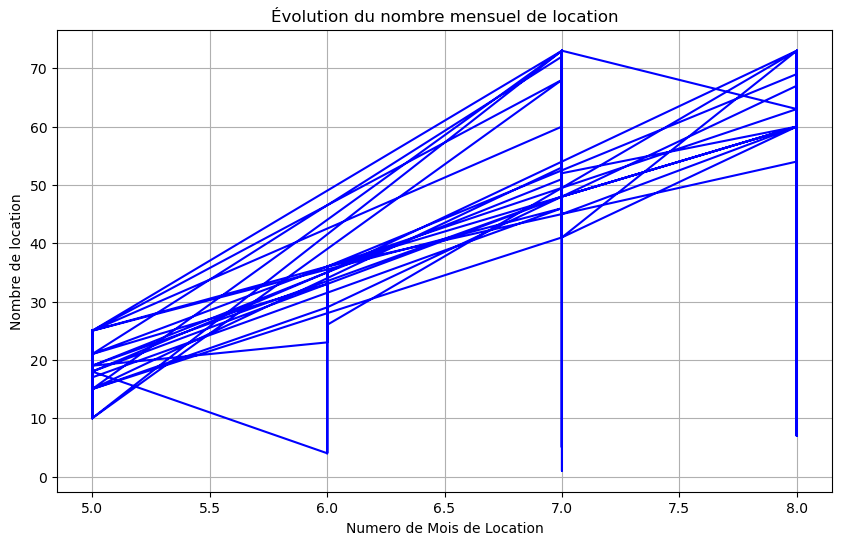

In [500]:
# Creation du graphique
plt.figure(figsize=(10, 6))
plt.plot(df_africa.index, df_africa['nombre_de_location'], color='blue')
plt.title('Évolution du nombre mensuel de location')
plt.xlabel('Numero de Mois de Location')
plt.ylabel('Nombre de location')
plt.grid(True)
plt.show()

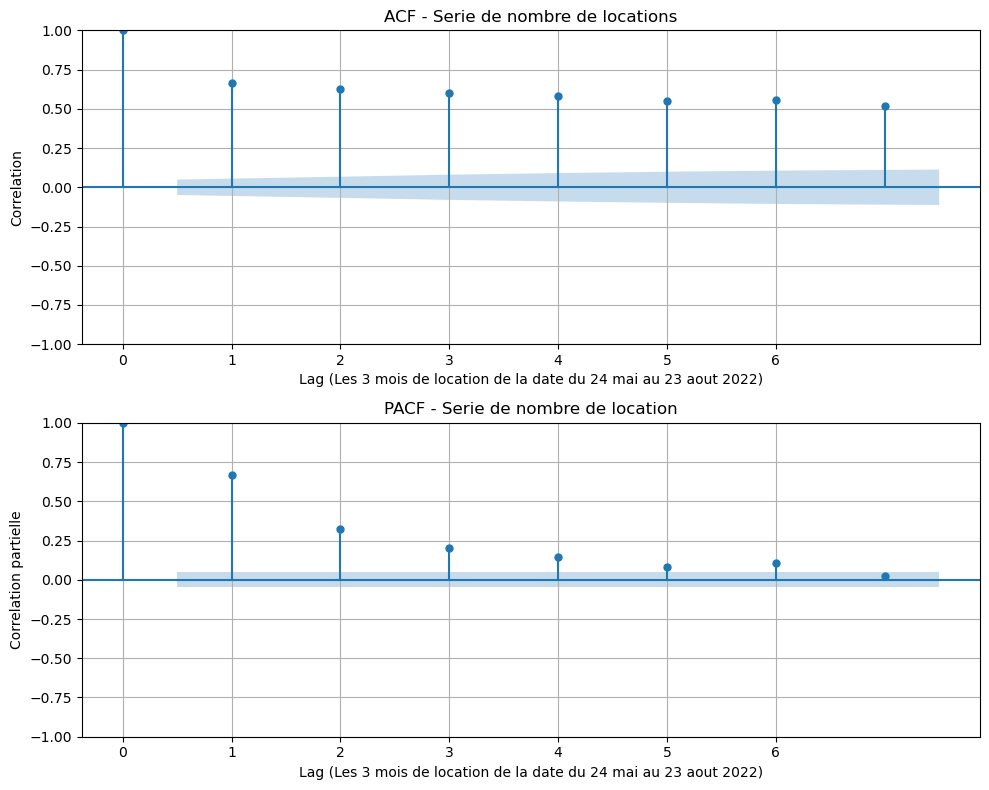

In [501]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creation des subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
 
    
######################################################################################################
# ACF (Autocorrelation Function)
# L'ACF mesure la corrélation entre les valeurs d'une série temporelle à différents décalages ou lags. 
# Cela montre la manière dont les observations sont corrélées entre elles sur plusieurs périodes.
######################################################################################################
# Trace de l'ACF
plot_acf(df_africa['nombre_de_location'], lags=7, zero=True, ax=ax1)
ax1.set_title('ACF - Serie de nombre de locations')
ax1.set_xlabel('Lag (Les 3 mois de location de la date du 24 mai au 23 aout 2022)')
ax1.set_ylabel('Correlation')
ax1.grid(True)

# Ajustement les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 7, 1))



######################################################################################################
# PACF (Partial Autocorrelation Function)
# La PACF mesure la corrélation partielle entre la série et ses valeurs décalées, 
# en éliminant l’effet des autres lags intermédiaires. Elle montre l'influence directe d'un décalage spécifique.
#######################################################################################################
# Trace de PACF
plot_pacf(df_africa['nombre_de_location'], lags=7, zero=True, ax=ax2)
ax2.set_title('PACF - Serie de nombre de location')
ax2.set_xlabel('Lag (Les 3 mois de location de la date du 24 mai au 23 aout 2022)')
ax2.set_ylabel('Correlation partielle')
ax2.grid(True)

# Ajustement des graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 7, 1))

# Ajustement des subplots
plt.tight_layout()

# Affichage du graphique
plt.show()

In [502]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# selection de la colonne nombre_de_location pour effectuer le test de Dickey-Fuller
colonne_numerique = df_africa['nombre_de_location']  

# Verification et conversion en numerique au cas ou
colonne_numerique = pd.to_numeric(colonne_numerique, errors='coerce').dropna()

#  le test de Dickey-Fuller augmente
result = adfuller(colonne_numerique)

# Formatage des resultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La serie est stationnaire' if result[1] < 0.05 else 'La serie est non stationnaire']
]

# Affichage des resultats sous forme de tableau
print(tabulate(table, headers=['Metrique', 'Valeur'], tablefmt='github'))


| Metrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -6.242130199264278        |
| P-valeur       | 4.6694904562560987e-08    |
| Conclusion     | La serie est stationnaire |


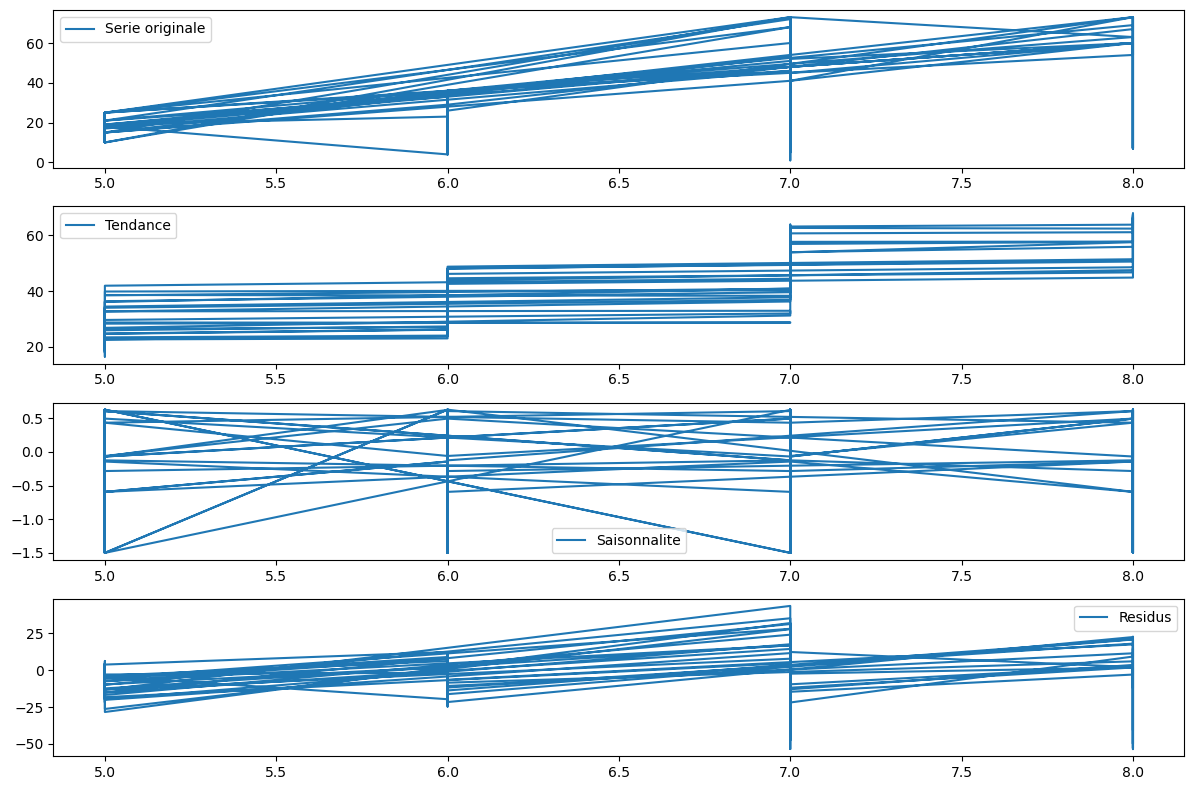

In [503]:
from statsmodels.tsa.seasonal import seasonal_decompose

# les donnees sont mensuelles, donc on fixe la periode a 12
decomposition = seasonal_decompose(df_africa['nombre_de_location'], model='additive', period=12)

# Extraction des composantes de la decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Affichage des composantes de la decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_africa['nombre_de_location'], label='Serie originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalite')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<h3 style="color: green;"> 3- Differenciation(stationnarisation) </h3>

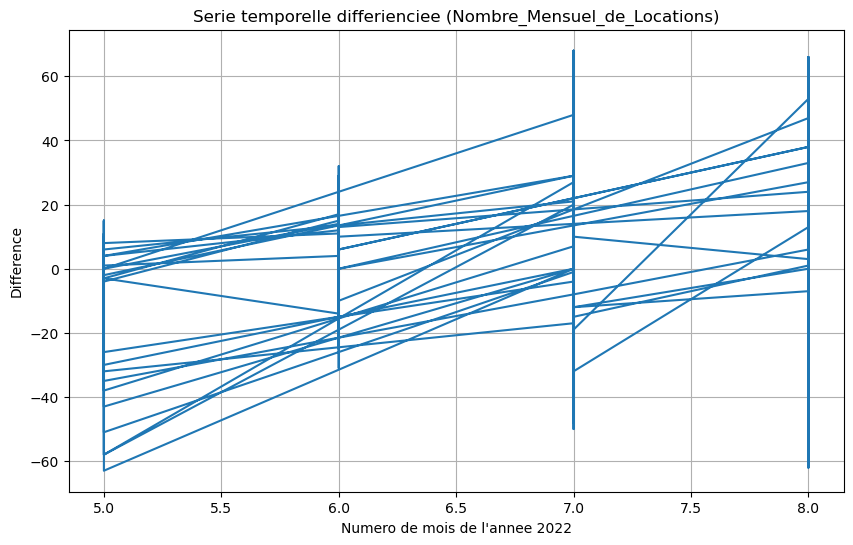

In [504]:

# Differenciation pour rendre la serie deja stationnaire encore plus stationnaire
differenced = df_africa['nombre_de_location'].diff().dropna()

# Affichage de la serie différienciee
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Serie temporelle differienciee (Nombre_Mensuel_de_Locations)')
plt.xlabel('Numero de mois de l\'annee 2022')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

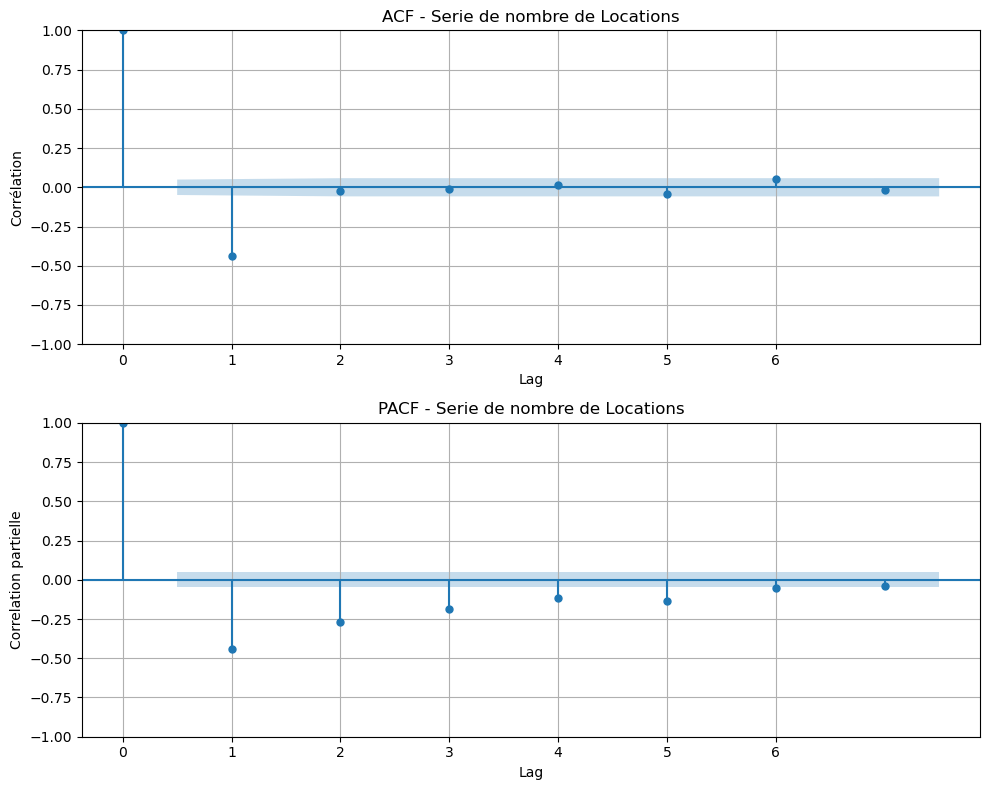

In [505]:
# les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Trace de l'ACF
plot_acf(differenced, lags=7, zero=True, ax=ax1)
ax1.set_title('ACF - Serie de nombre de Locations')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajustement des graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 7, 1))

# Trace du PACF
plot_pacf(differenced, lags=7, zero=True, ax=ax2)
ax2.set_title('PACF - Serie de nombre de Locations')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Correlation partielle')
ax2.grid(True)

# Ajustement des graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 7, 1))

# Ajustement des subplots
plt.tight_layout()

# Affichage du graphique
plt.show()

In [506]:
# Analyse de la stationnarite de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# le test de Dickey-Fuller augmente
result = adfuller(differenced)

# Formatage des resultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Affichage des resultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -15.04696106831625        |
| P-valeur       | 9.413892947209936e-28     |
| Conclusion     | La série est stationnaire |


<h3 style="color: green;"> 3- Identification de l'ordre p,q,d  </h3>

In [507]:
p=2 # indique que nous incluons les deux valeurs précédentes de la série dans le modèle
d=1 #  indique que nous appliquons une différenciation à la série pour la rendre stationnaire.
q=1,3 # signifie que nous envisagons d'expérimenter avec deux modèles différents. Le premier inclura le terme de moyenne mobile d'ordre 1, tandis que le second inclura un terme de moyenne mobile d'ordre 3

<h3 style="color: green;"> 4- Estimation du modele  </h3>

In [508]:
# Calcul de la taille de l'ensemble d'entrainement (70%)
train_size = int(0.7 * len(df_africa))

# Separation des donnees
train_data = df_africa['nombre_de_location'][:train_size]
test_data = df_africa['nombre_de_location'][train_size:]

In [509]:
from statsmodels.tsa.arima.model import ARIMA

# Creation d'un modele ARIMA(2,1,1)
model = ARIMA(train_data, order=(2, 1, 1))

# Ajustement du modele
model_fit = model.fit()

# Affichage du resume du modele
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:     nombre_de_location   No. Observations:                 1111
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4303.685
Date:                Fri, 01 Nov 2024   AIC                           8615.370
Time:                        17:11:46   BIC                           8635.419
Sample:                             0   HQIC                          8622.951
                               - 1111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1280      0.050      2.558      0.011       0.030       0.226
ar.L2          0.0518      0.038      1.345      0.179      -0.024       0.127
ma.L1         -0.7592      0.045    -16.720      0.0

<h3 style="color: green;"> 5- Verification du modele  </h3>

<Figure size 1000x500 with 0 Axes>

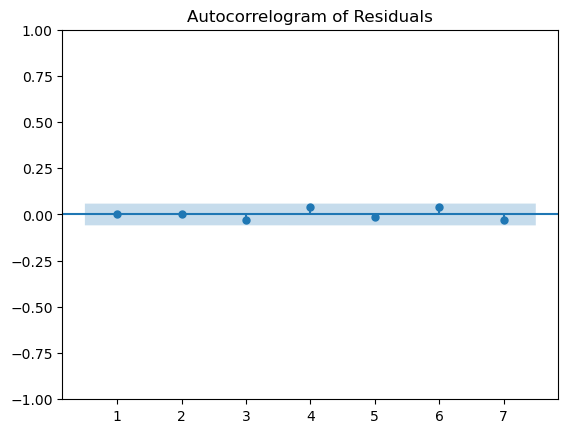

<Figure size 1000x500 with 0 Axes>

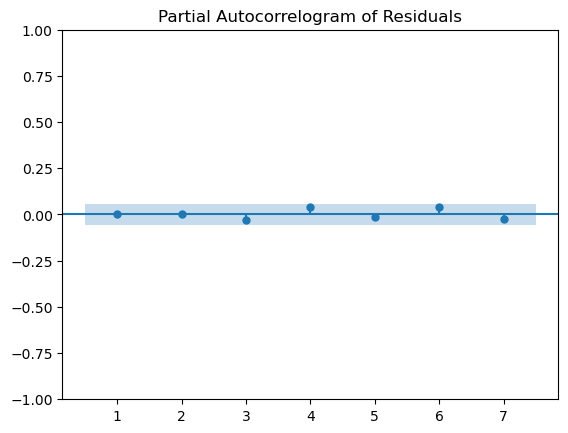

In [510]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des residus
residuals = model_fit.resid

# Trace de l'ACF des rsidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=7, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer de la PACF des residus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=7, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


<h3 style="color: green;"> 6- Prediction  </h3>

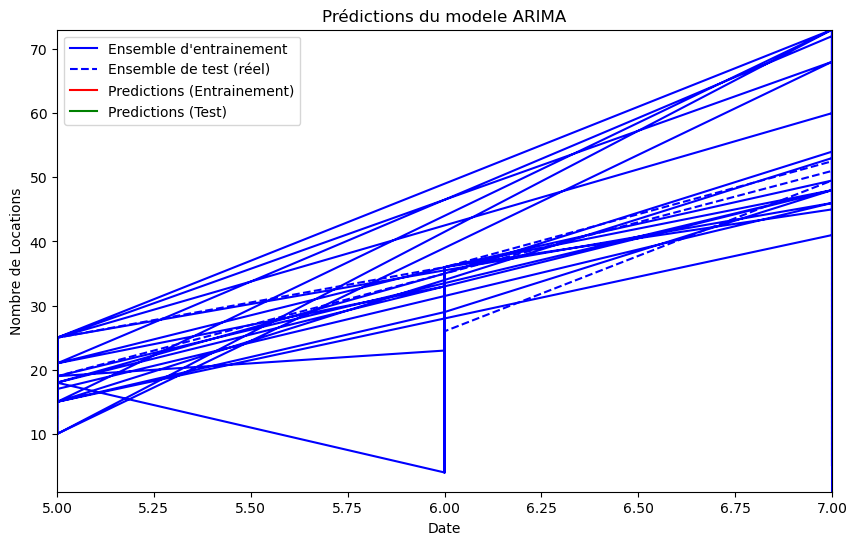

In [514]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions sur l'ensemble d'entrainement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Predictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Predictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Predictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Trace des predictions et les donnees reelles avec les courbes collees
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entrainement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Predictions (Entrainement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Predictions (Test)', color='green')

# Definition des limites des axes x et y pour une continuite visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Nombre de Locations')
plt.title('Prédictions du modele ARIMA')
plt.legend()
plt.show()

In [515]:
# les predictions pour l'ensemble d'entrainement
train_predictions = model_fit.predict(start=0, end=len(train_data)-1)

# les predictions pour l'ensemble de test
test_predictions = model_fit.forecast(steps=len(test_data))


# Mesures de performance sur l'ensemble d'entrainement
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Creation d'un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)


  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 8.554999         33.910346
1      MSE               136.661309       1359.532919
2     RMSE                11.690223         36.871845
3       R²                 0.567667         -4.637678


In [516]:
# Définition de la période de prédiction
start_date = '2022-08-24'
end_date = '2022-09-21'  
n_steps = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Génération des prédictions pour la période définie
predictions = model_fit.forecast(steps=n_steps)

# Création d'un index de date pour les prédictions
prediction_index = pd.date_range(start=start_date, periods=n_steps, freq='D')

# Création d'un DataFrame pour les prédictions
predictions_df = pd.DataFrame({
    'Date': prediction_index,
    'Prédictions': predictions
})

# Enregistrement dans un fichier CSV
predictions_df.to_csv('predictions_24_aout_21_septembre_2022.csv', index=False)

print("Le fichier CSV des prédictions a été généré avec succès.")

Le fichier CSV des prédictions a été généré avec succès.


<h3 style="color: green;"> 7- Modele Automatique  </h3>

In [517]:
#!pip install pmdarima

In [518]:
import pmdarima as pm

# Calcul de la taille de l'ensemble d'entrainement (70%)
train_size = int(0.7 * len(df_africa))

# Separation des donnees
train_data = df_africa['nombre_de_location'][:train_size]
test_data = df_africa['nombre_de_location'][train_size:]

# Utilisation auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1111
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -4297.604
Date:                Fri, 01 Nov 2024   AIC                           8613.207
Time:                        17:14:36   BIC                           8658.316
Sample:                             0   HQIC                          8630.265
                               - 1111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0430      0.413     -0.104      0.917      -0.852       0.766
ar.L1         -1.8682      0.022    -83.408      0.000      -1.912      -1.824
ar.L2         -0.9694      0.021    -45.249      0.0

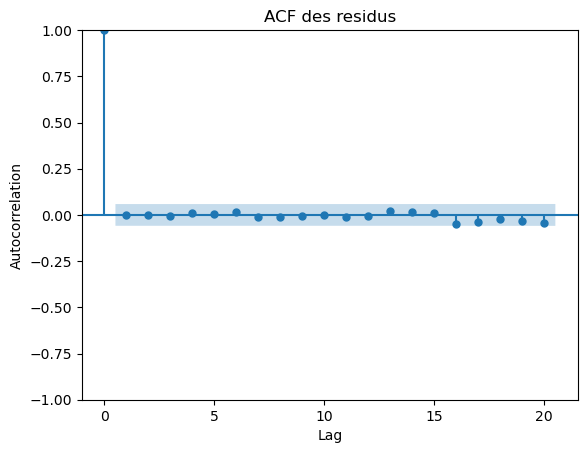

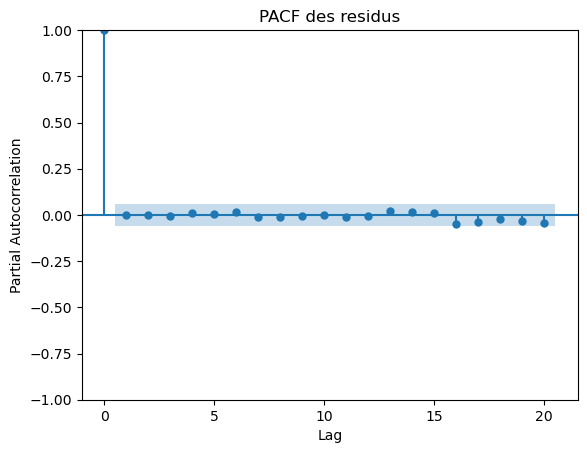

In [519]:
# Ajustement du modele aux donnees
model.fit(train_data)

# les residus du modele
residuals = model.resid()

# Trace de la fonction d'autocorrelation (ACF) des residus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des residus')
plt.show()

# Trace de la fonction d'autocorrelation partielle (PACF) des residus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des residus')
plt.show()

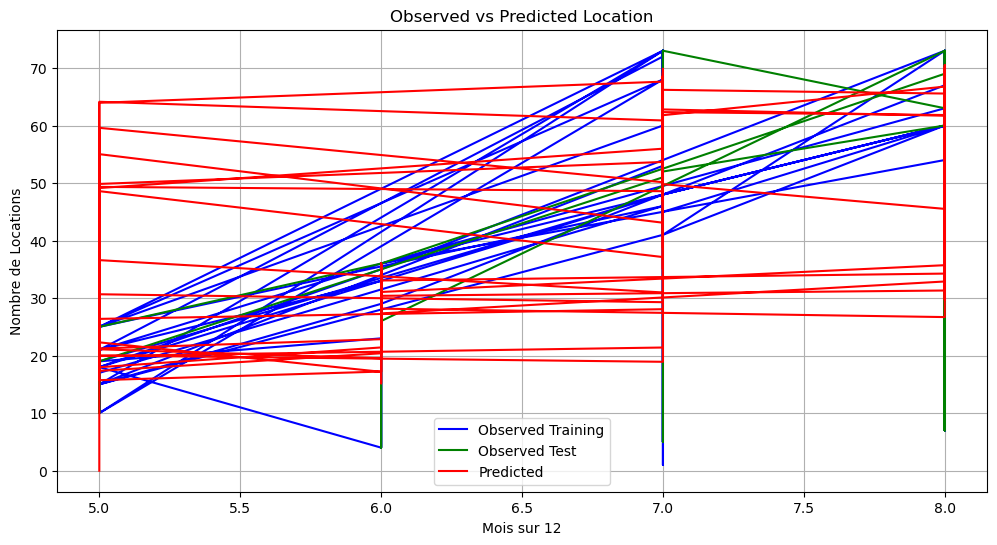

In [520]:

# les predictions sur l'ensemble d'entrainement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Les predictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concatenation des predictions pour l'ensemble d'entrainement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Trace des valeurs reelles et les predictions pour l'ensemble d'entrainement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Mois sur 12')
plt.ylabel('Nombre de Locations')
plt.title('Observed vs Predicted Location')
plt.legend()
plt.grid(True)
plt.show()


In [521]:
# les mesures de performance sur l'ensemble d'entrainement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Le DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)




  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 8.490417         36.764168
1      MSE               135.200080       1576.438926
2     RMSE                11.627557         39.704394
3       R²                 0.572290         -5.537139



### Résultats des Modèles

#### 1. Modèle ARIMA :
| Métrique | Ensemble d'entraînement | Ensemble de test |
|----------|-------------------------|------------------|
| MAE      | 8.554999                | 33.910346        |
| MSE      | 136.661309              | 1359.532919      |
| RMSE     | 11.690223               | 36.871845        |
| R²       | 0.567667                | -4.637678        |

#### 2. Modèle Automatique :
| Métrique | Ensemble d'entraînement | Ensemble de test |
|----------|-------------------------|------------------|
| MAE      | 8.490417                | 36.764168        |
| MSE      | 135.200080              | 1576.438926      |
| RMSE     | 11.627557               | 39.704394        |
| R²       | 0.572290                | -5.537139        |

### Comparaison des Performances

1. **MAE (Mean Absolute Error)**:
   - **ARIMA**: 33.91 (test)
   - **Automatique**: 36.76 (test)
   - **Conclusion**: ARIMA a un MAE inférieur, indiquant une meilleure précision globale sur l'ensemble de test.

2. **MSE (Mean Squared Error)**:
   - **ARIMA**: 1359.53 (test)
   - **Automatique**: 1576.44 (test)
   - **Conclusion**: ARIMA a un MSE inférieur, ce qui suggère qu'il fait des erreurs au carré plus petites sur l'ensemble de test.

3. **RMSE (Root Mean Squared Error)**:
   - **ARIMA**: 36.87 (test)
   - **Automatique**: 39.70 (test)
   - **Conclusion**: ARIMA a également un RMSE inférieur, ce qui indique qu'il a une meilleure performance sur les erreurs de prédiction.

4. **R² (Coefficient de Détermination)**:
   - **ARIMA**: -4.637678 (test)
   - **Automatique**: -5.537139 (test)
   - **Conclusion**: Bien que les deux modèles aient des valeurs R² négatives, ARIMA est supérieur, indiquant une meilleure proportion de variance expliquée par le modèle.

### Conclusion Générale

Sur la base des métriques de performance, **le modèle ARIMA** est globalement plus performant que le modèle automatique, en particulier en ce qui concerne les métriques MAE, MSE et RMSE. Cela indique qu'ARIMA peut fournir des prédictions plus précises et fiables pour notre série temporelle `nombre_de_location`. 
